# Import required Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

from scipy import stats

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from collections import Counter
from imblearn.over_sampling import SMOTE
sm= SMOTE()
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, classification_report, recall_score, precision_score

In [3]:
df = pd.read_csv("Customer Data.csv")

# Basic checks:

In [4]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [6]:
df.sample(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2291,C12362,248.200613,1.000000,2329.12,1567.22,761.90,0.000000,1.000000,0.916667,0.583333,0.000000,0,31,5500.0,812.097275,231.774034,0.166667,12
8861,C19102,45.425151,1.000000,360.00,0.00,360.00,0.000000,1.000000,0.000000,0.875000,0.000000,0,8,1000.0,308.451142,119.669987,0.666667,8
1051,C11086,554.289791,1.000000,90.00,90.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,7000.0,414.117463,189.979169,0.000000,12
4299,C14417,4988.093733,1.000000,8581.29,4640.84,3940.45,225.473003,1.000000,0.666667,1.000000,0.083333,1,94,10500.0,1571.883000,1133.733957,0.000000,12
62,C10064,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
2842,C12924,2.386716,0.454545,115.00,0.00,115.00,0.000000,1.000000,0.000000,0.916667,0.000000,0,12,8500.0,99.456136,21.497533,0.000000,12
6226,C16399,857.313072,1.000000,139.16,0.00,139.16,0.000000,0.583333,0.000000,0.583333,0.000000,0,9,1200.0,1209.136709,641.545430,0.000000,12
4037,C14151,2033.538173,1.000000,929.25,297.51,631.74,1567.042271,1.000000,0.250000,1.000000,0.083333,1,20,3500.0,1291.318410,1843.752247,0.000000,12
8370,C18593,40.764223,0.545455,0.00,0.00,0.00,1374.929089,0.000000,0.000000,0.000000,0.166667,2,0,1200.0,2232.232120,43.653577,0.000000,12
6103,C16274,50.682705,0.909091,434.60,64.00,370.60,0.000000,0.833333,0.083333,0.833333,0.000000,0,11,4000.0,538.381397,136.480614,0.100000,12


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [9]:
df.describe(include = 'O')

,CUST_ID
count,8950
unique,8950
top,C10001
freq,1


In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [12]:
print(f"Features names are :\n{df.columns.values}")

Features names are :
['CUST_ID' 'BALANCE' 'BALANCE_FREQUENCY' 'PURCHASES' 'ONEOFF_PURCHASES'
 'INSTALLMENTS_PURCHASES' 'CASH_ADVANCE' 'PURCHASES_FREQUENCY'
 'ONEOFF_PURCHASES_FREQUENCY' 'PURCHASES_INSTALLMENTS_FREQUENCY'
 'CASH_ADVANCE_FREQUENCY' 'CASH_ADVANCE_TRX' 'PURCHASES_TRX'
 'CREDIT_LIMIT' 'PAYMENTS' 'MINIMUM_PAYMENTS' 'PRC_FULL_PAYMENT' 'TENURE']


In [13]:
df.shape

(8950, 18)

In [14]:
df.size

161100

In [15]:
df.drop('CUST_ID', axis= 1, inplace= True)

In [16]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# EDA:

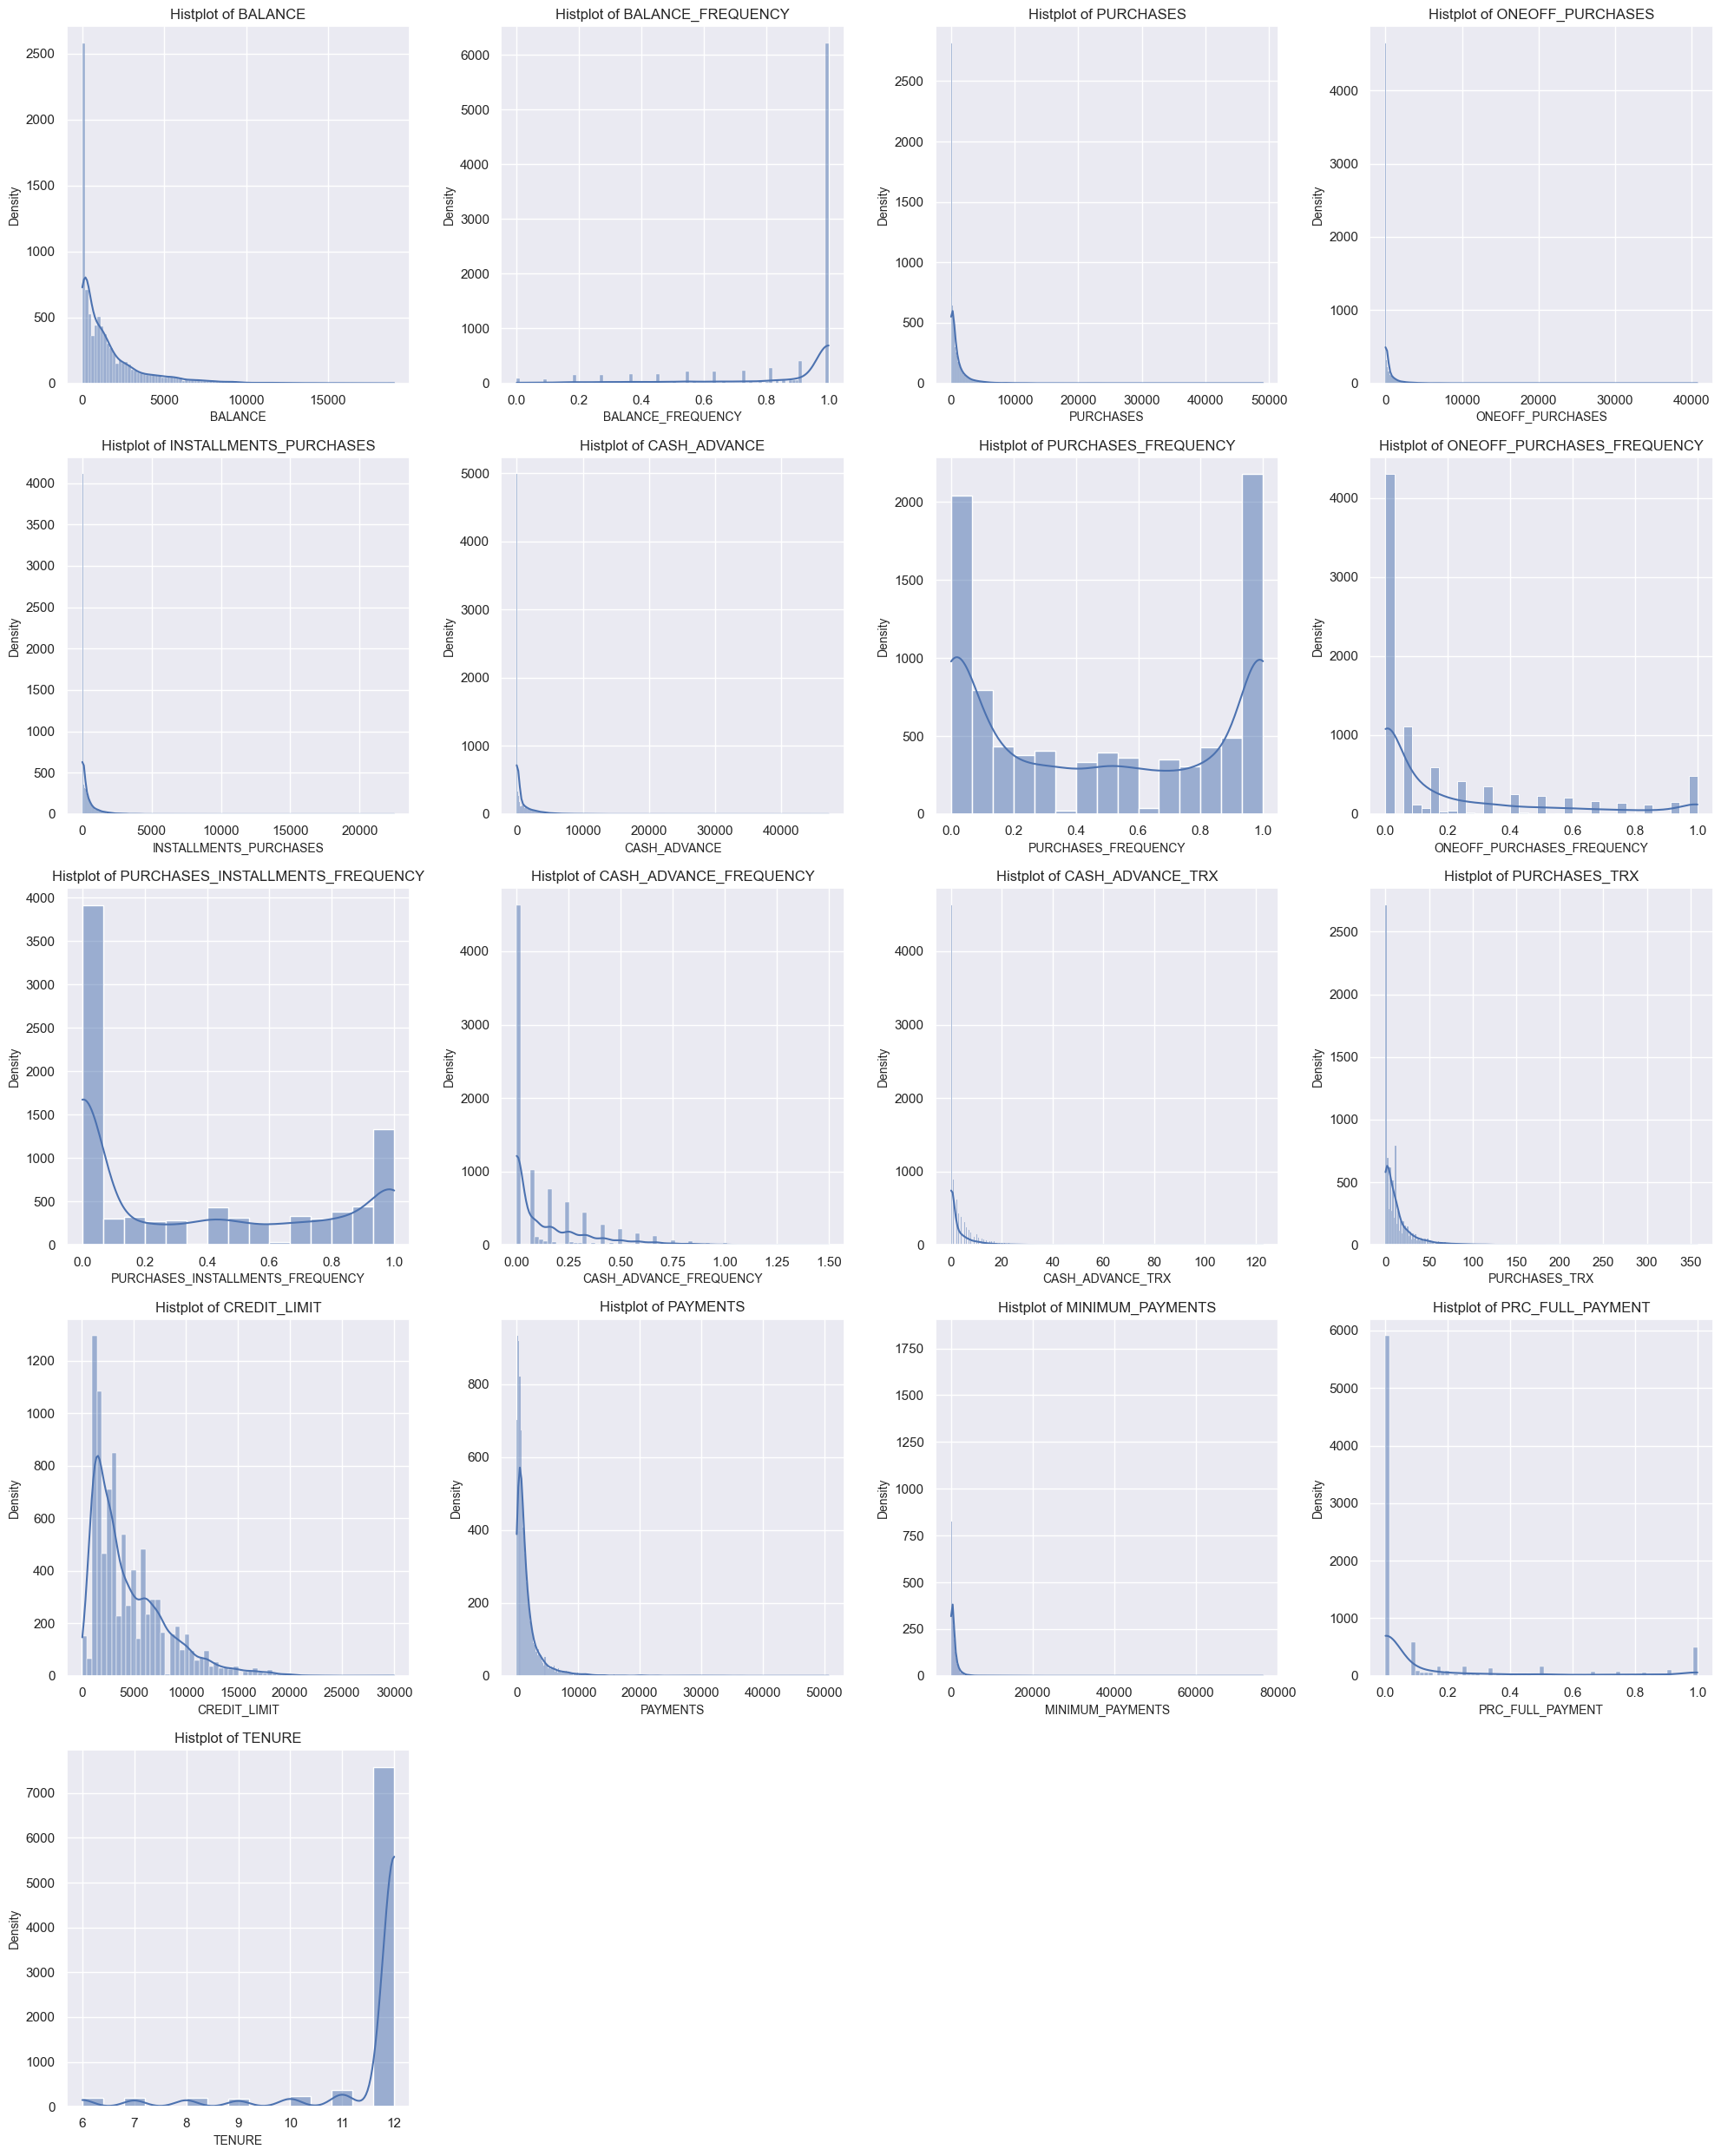

In [17]:
sns.set(style = 'darkgrid')
plt.figure(figsize = (20, 25), facecolor = 'white')
plotnumber = 1
for col in df.columns:
    if plotnumber <= 20:
        plt.subplot(5,4,plotnumber)
        sns.histplot(x = df[col], kde = True)
        plt.title(f"Histplot of {col}")
        plt.xlabel(col, fontsize = 10)
        plt.ylabel("Density", fontsize = 10)
        plotnumber += 1

plt.tight_layout()
plt.show()

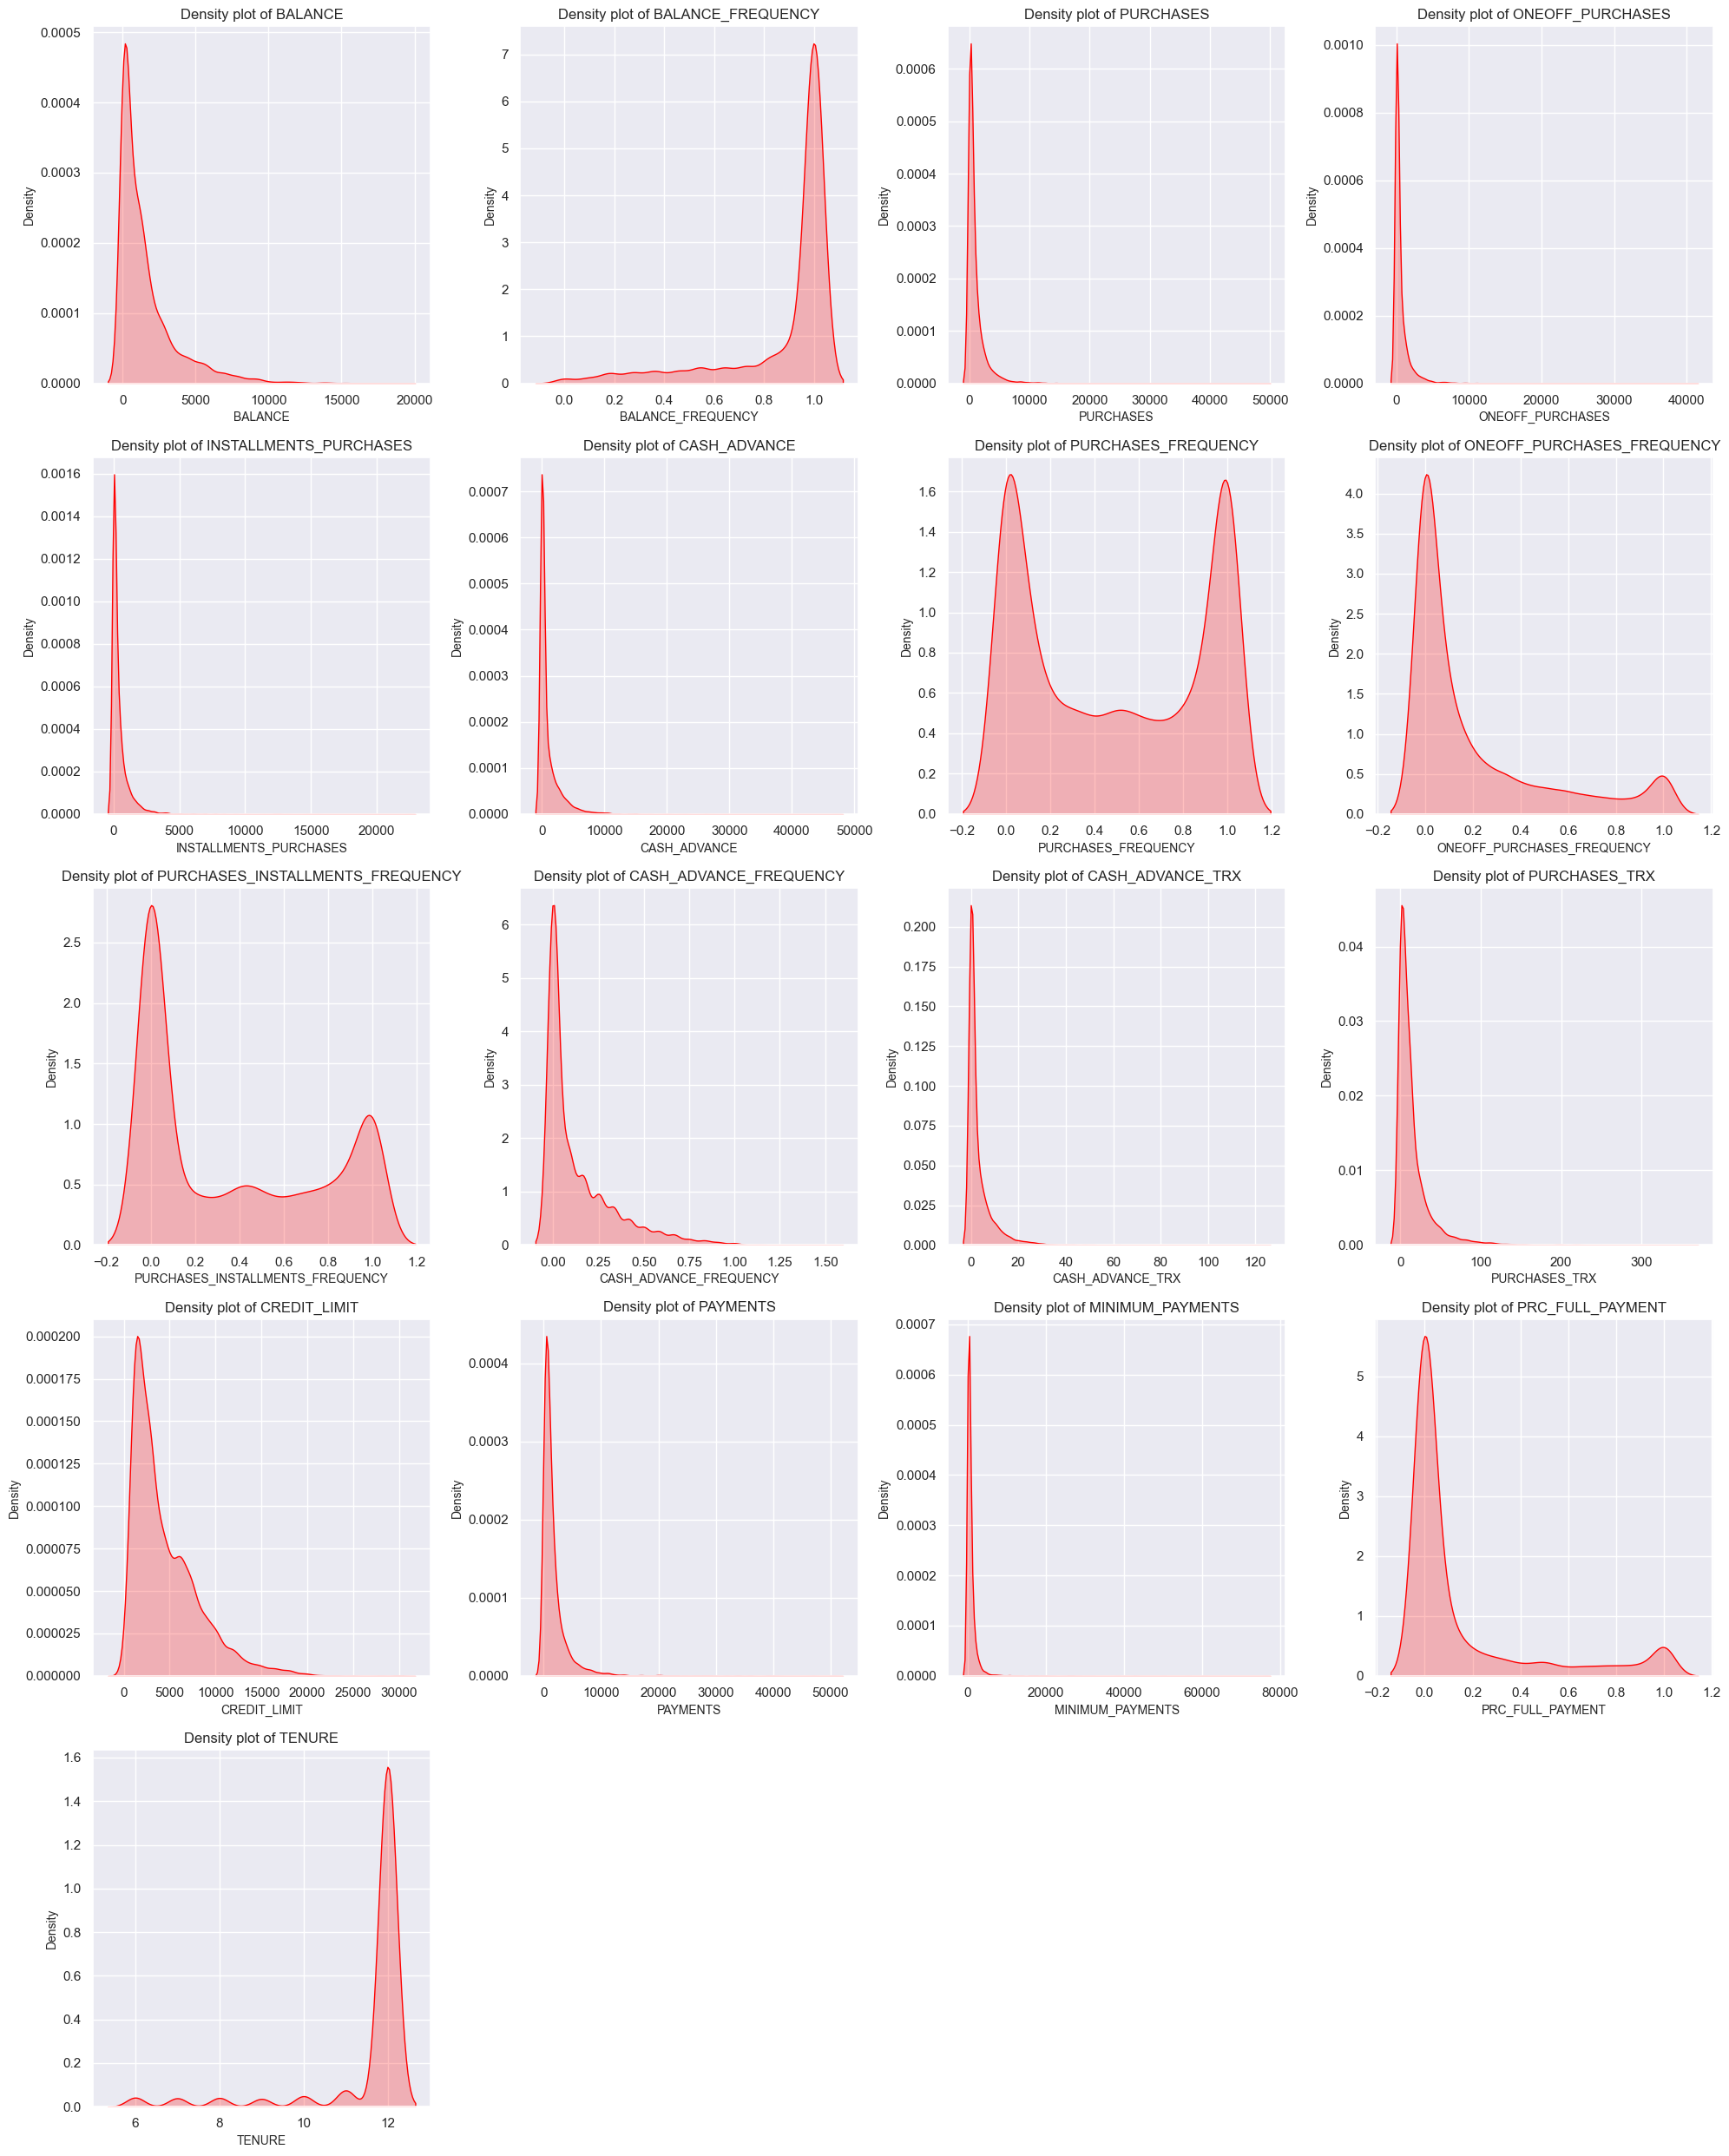

In [18]:
plt.figure(figsize = (20,25), facecolor = 'white')
for i,col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(5, 4, i +1)
        sns.kdeplot(df[col], fill = True, color = 'red', ax = ax)
        plt.title(f"Density plot of {col}")
        plt.xlabel(col, fontsize= 10)
        plt.ylabel('Density', fontsize = 10)

plt.tight_layout()
plt.show()

In [19]:
plt.figure(figsize = (40, 40))
# sns.pairplot(df)

<Figure size 4000x4000 with 0 Axes>

<Figure size 4000x4000 with 0 Axes>

# Data Preprocessing:

In [20]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [21]:
df['CREDIT_LIMIT'].median()

3000.0

In [22]:
df.loc[df['CREDIT_LIMIT'].isnull() == True, 'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].median()

In [23]:
df.loc[df['MINIMUM_PAYMENTS'].isnull() == True, 'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].median()

In [24]:
# We have no categorical values :

# Outlier:

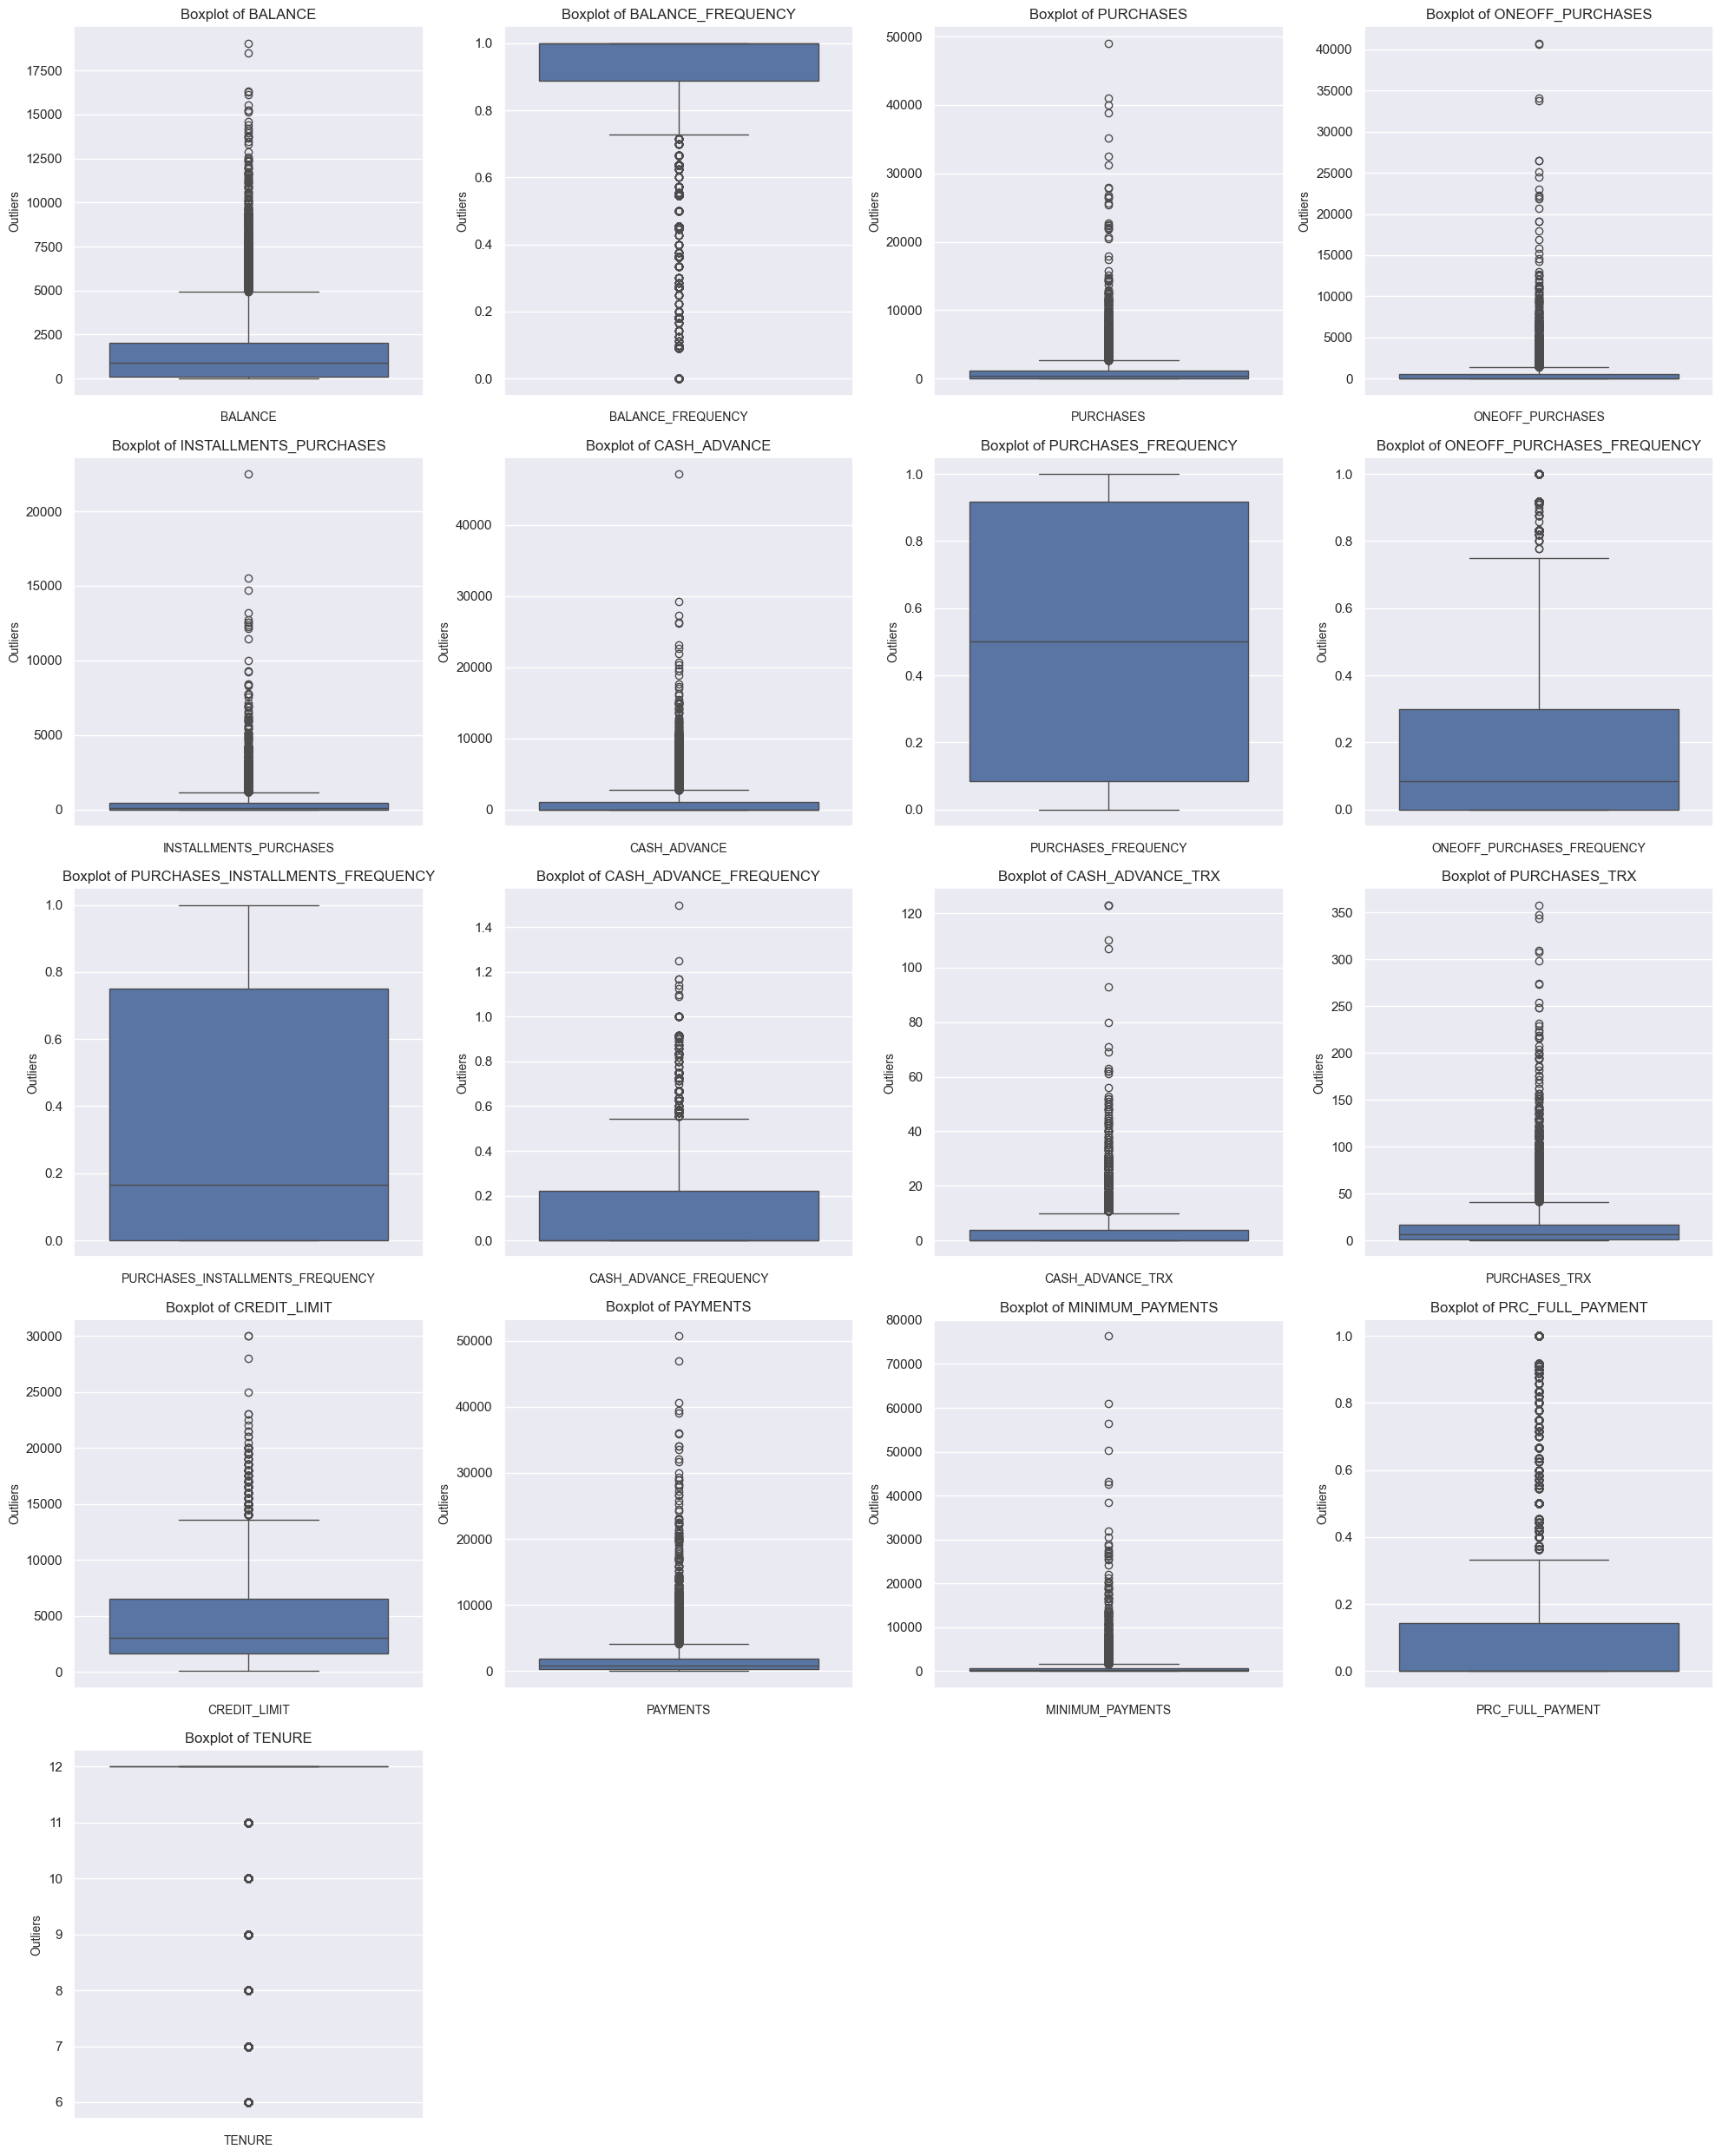

In [25]:
plt.figure(figsize = (20, 25), facecolor= 'white')
for i , col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(5,4, i + 1)
        sns.boxplot(df[col], ax = ax)
        plt.title(f"Boxplot of {col}")
        plt.xlabel(col, fontsize = 10)
        plt.ylabel("Outliers", fontsize= 10)

plt.tight_layout()
plt.show()

In [26]:
df.TENURE.mode()[0]

12

In [27]:
for column in df.columns[:-1]:
    q1 = df[column].quantile(0.25)
    q3 =df[column].quantile(0.75)
    iqr = q3 - q1
    min_limit = q1 -1.5 * iqr
    max_limit = q3 + 1.5 * iqr
    df[column] = np.where((df[column]< min_limit) | (df[column]>max_limit),
                         df[column].median(), df[column])

In [28]:
iqr = stats.iqr(df['TENURE'], interpolation = 'midpoint')
iqr

0.0

In [29]:
q1 = np.percentile(df['TENURE'], 25)
q3 = np.percentile(df['TENURE'], 75)
iqr = q1- q3

In [30]:
min_limit= q1 - 1.5 * iqr
max_limit = q3 + 1.5 * iqr

In [31]:
df.loc[(df['TENURE'] < min_limit) | (df['TENURE'] > max_limit), 'TENURE'] = df['TENURE'].mode()[0]

# Scaling:

In [32]:
scler = StandardScaler()

In [33]:
df_scale = scler.fit_transform(df)

In [34]:
df_scale

array([[-0.90488809, -2.64864143, -0.68937009, ..., -0.75455922,
        -0.4014317 ,  0.        ],
       [ 1.86299309, -1.14130824, -0.84260689, ...,  1.80748236,
         2.73919246,  0.        ],
       [ 1.24375145,  0.36602496,  0.39930184, ...,  0.58512674,
        -0.4014317 ,  0.        ],
       ...,
       [-0.92021077, -2.39742752, -0.61066356, ..., -0.9113622 ,
         3.13177401,  0.        ],
       [-0.92891399, -2.39742752, -0.84260689, ..., -0.98459207,
         3.13177401,  0.        ],
       [-0.61439817,  0.36602496,  0.91343218, ..., -0.89523849,
        -0.4014317 ,  0.        ]])

In [35]:
df_1_scale = pd.DataFrame(df_scale,columns = df.columns)

In [36]:
df_1_scale.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.904888,-2.648641,-0.689370,-0.579149,-0.346206,-0.535016,-0.806490,-0.676778,-0.707313,-0.680573,-0.597663,-0.709401,-1.042417,-0.929030,-0.754559,-0.401432,0.0
1,1.862993,-1.141308,-0.842607,-0.579149,-0.692870,-0.535016,-1.221758,-0.676778,-0.916995,1.139671,1.012415,-0.920725,0.963202,3.357806,1.807482,2.739192,0.0
2,1.243751,0.366025,0.399302,1.713915,-0.692870,-0.535016,1.269843,-0.231028,-0.916995,-0.680573,-0.597663,0.347221,1.130337,-0.467225,0.585127,-0.401432,0.0
3,0.518437,0.366025,1.565170,-0.466449,-0.692870,-0.222243,-1.014125,-0.231028,-0.916995,-0.073827,-0.195143,-0.815063,1.130337,-1.150778,-0.279866,-0.401432,0.0
4,-0.224805,0.366025,-0.816907,-0.531696,-0.692870,-0.535016,-1.014125,-0.231028,-0.916995,-0.680573,-0.597663,-0.815063,-0.975563,-0.405396,-0.465401,-0.401432,0.0


# PCA:

In [37]:
pc = PCA(n_components=2)
df_1_pca = pc.fit_transform(df_1_scale)

In [38]:
df_1_pca

array([[-1.04279335, -2.65980009],
       [-2.31205881,  2.31687649],
       [ 0.74905628,  0.96600941],
       ...,
       [ 0.63137139, -2.82542534],
       [-1.88593494, -2.56231854],
       [ 1.19338259,  1.07875279]])

In [39]:
df2 = pd.DataFrame(df_1_pca, columns = ['PCA1','PCA2'])

In [40]:
df2.head()

,PCA1,PCA2
0,-1.042793,-2.659800
1,-2.312059,2.316876
2,0.749056,0.966009
3,-0.912578,-0.059726
4,-1.373956,-1.738436


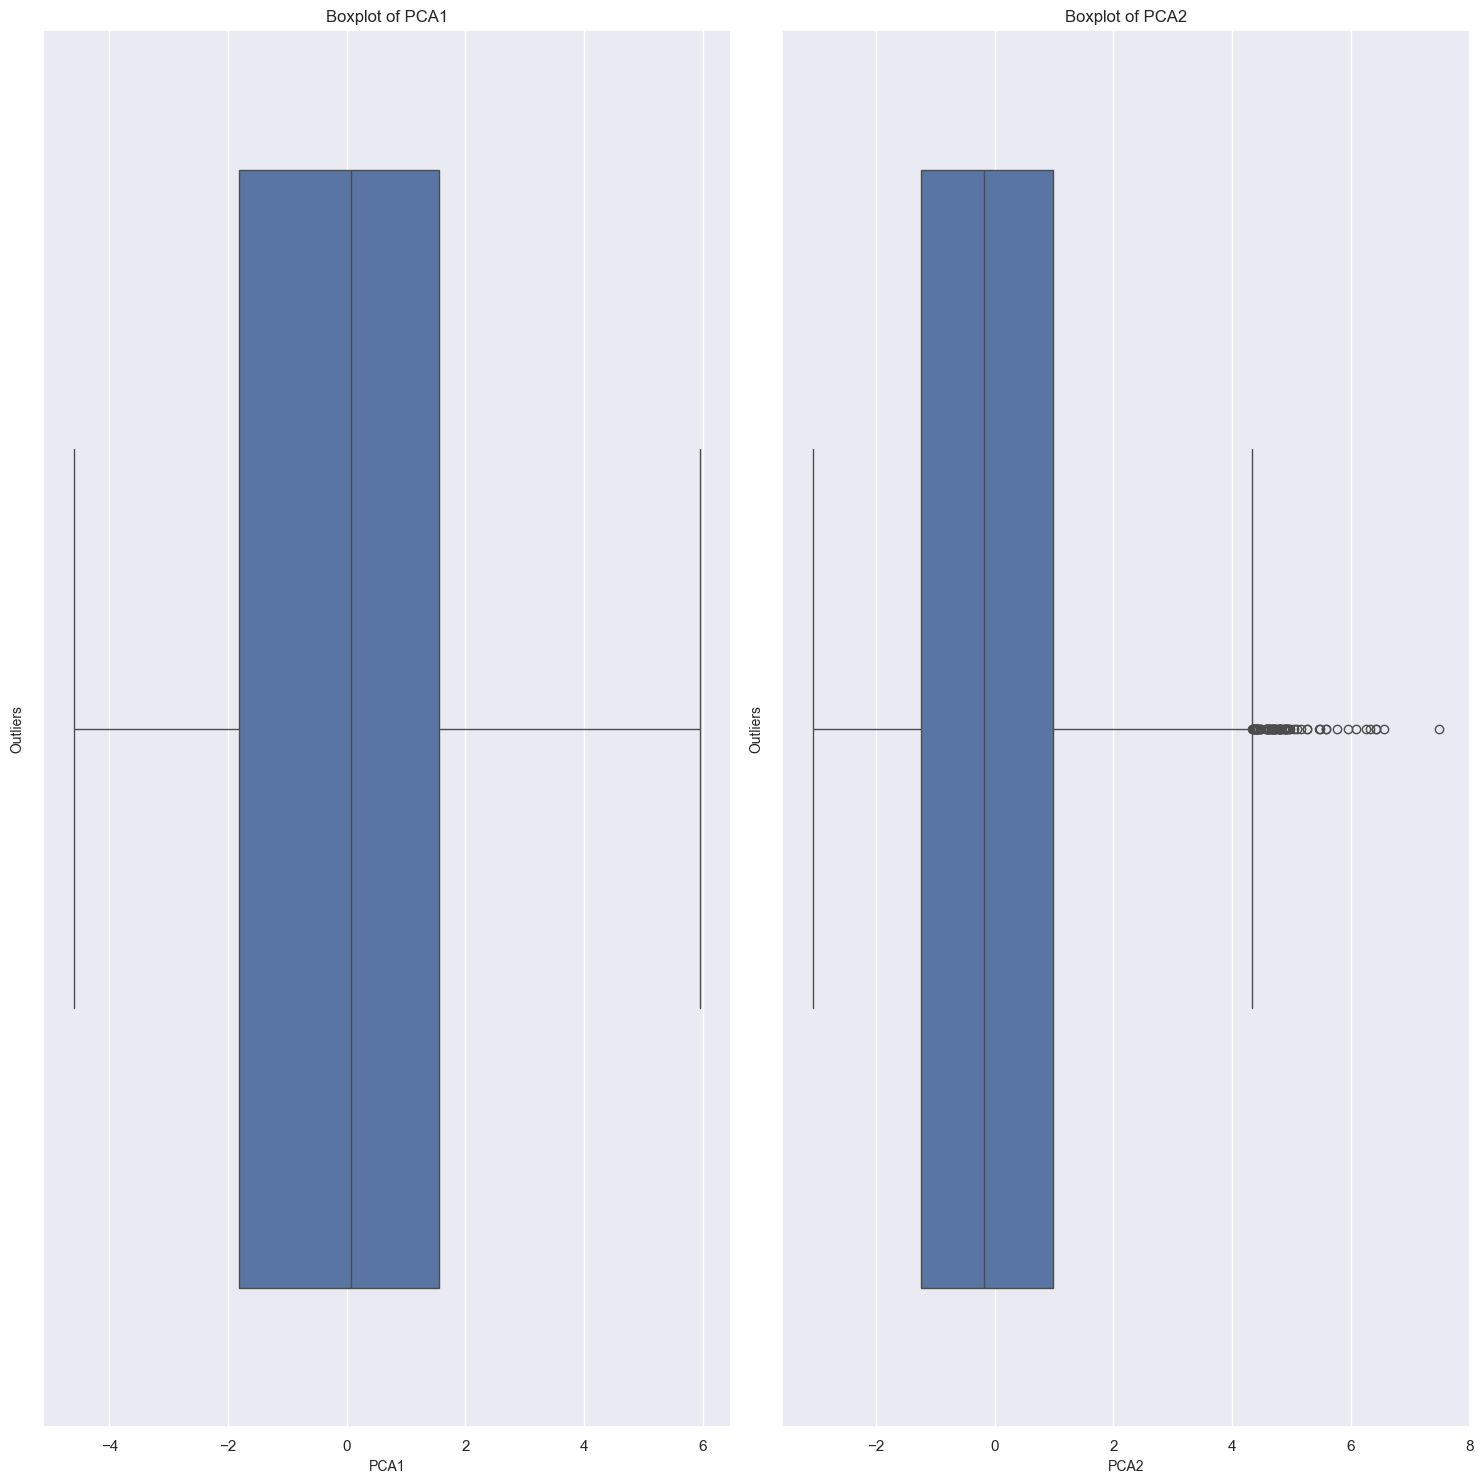

In [41]:
plt.figure(figsize = (15, 15), facecolor = 'white')
plotnumber = 1
for column in df2.columns:
    plt.subplot(1,2, plotnumber)
    sns.boxplot(x = df2[column])
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column, fontsize = 10)
    plt.ylabel("Outliers", fontsize = 10)
    plotnumber += 1

plt.tight_layout()
plt.show()

In [42]:
# iqr = stats.iqr(df2.PCA2, interpolation= 'midpoint')
# iqr
# q1 = df2['PCA2'].quantile(0.25)
# q3 = df2['PCA2'].quantile(0.75)
# iqr = q3 -q1
# min_limit = q1 - 1.5 * iqr
# max_linit = q3 + 1.5 * iqr
# df2.loc[df2['PCA2']>4.5, 'PCA2'] = np.median(df2.PCA2)

# Feature Selection:

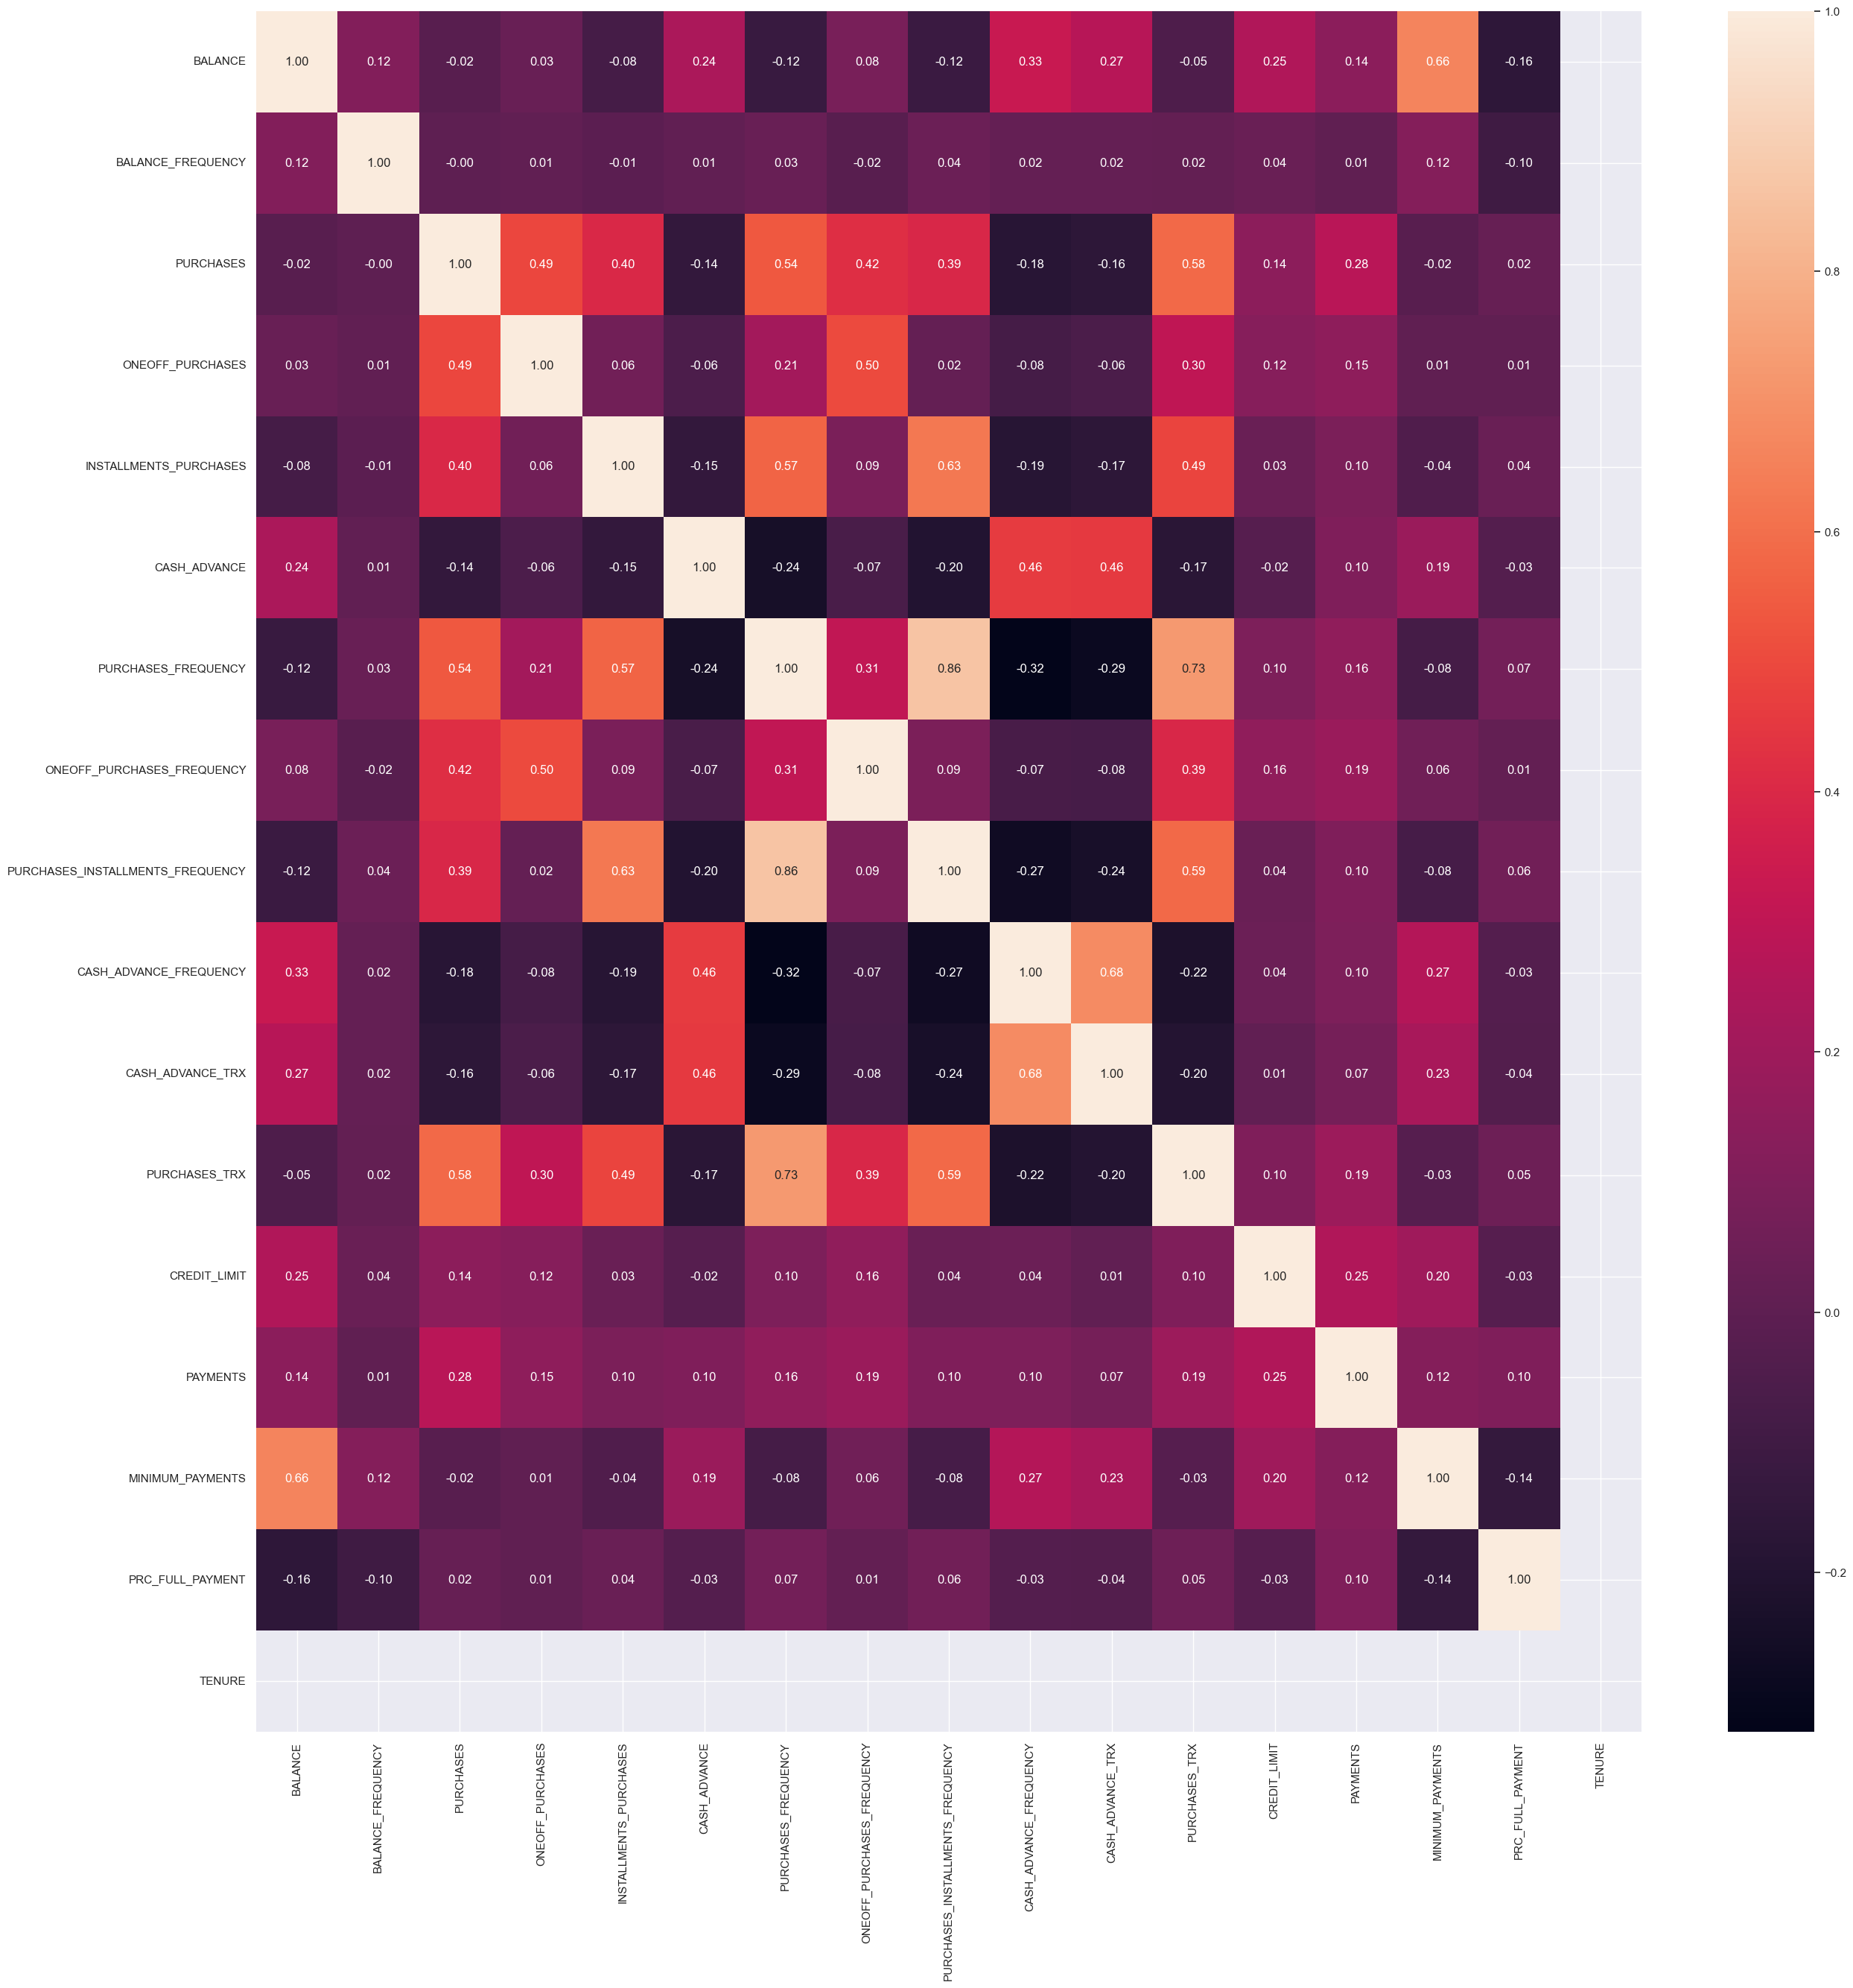

In [43]:
plt.figure(figsize = (30,30), facecolor = 'white')
sns.heatmap(df.corr(), annot = True, fmt = '.2f', color = 'skyblue')
plt.show()

# Elbow Technique:

In [44]:
# Munual way to find optimal value of k:

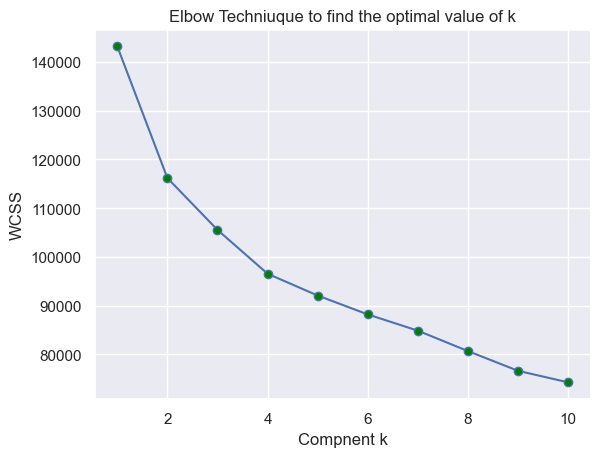

In [45]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42,init = 'k-means++')
    km.fit_predict(df_1_scale)
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss, marker = 'o', mfc = 'green')
plt.title("Elbow Techniuque to find the optimal value of k")
plt.xlabel("Compnent k")
plt.ylabel("WCSS")
plt.show()

# Direct Method:

In [46]:
from kneed import KneeLocator
# kl = KneeLocator(range(1,11), wcss, curve='convex', direction = 'decreasing')
kl = KneeLocator(range(1,11), wcss, curve = 'convex', direction = 'decreasing')
kl.elbow

4

In [47]:
model = KMeans(n_clusters=4)
model.fit(df2)

KMeans(n_clusters=4)

In [48]:
model.labels_

array([0, 1, 3, ..., 0, 0, 3])

In [49]:
df2['Cluster'] = model.labels_

In [50]:
model.cluster_centers_

array([[-0.86622256, -1.3715001 ],
       [-2.52634389,  0.9429659 ],
       [ 1.9502522 , -0.5162297 ],
       [ 1.27790829,  2.21815411]])

In [51]:
df2.head()

,PCA1,PCA2,Cluster
0,-1.042793,-2.659800,0
1,-2.312059,2.316876,1
2,0.749056,0.966009,3
3,-0.912578,-0.059726,0
4,-1.373956,-1.738436,0


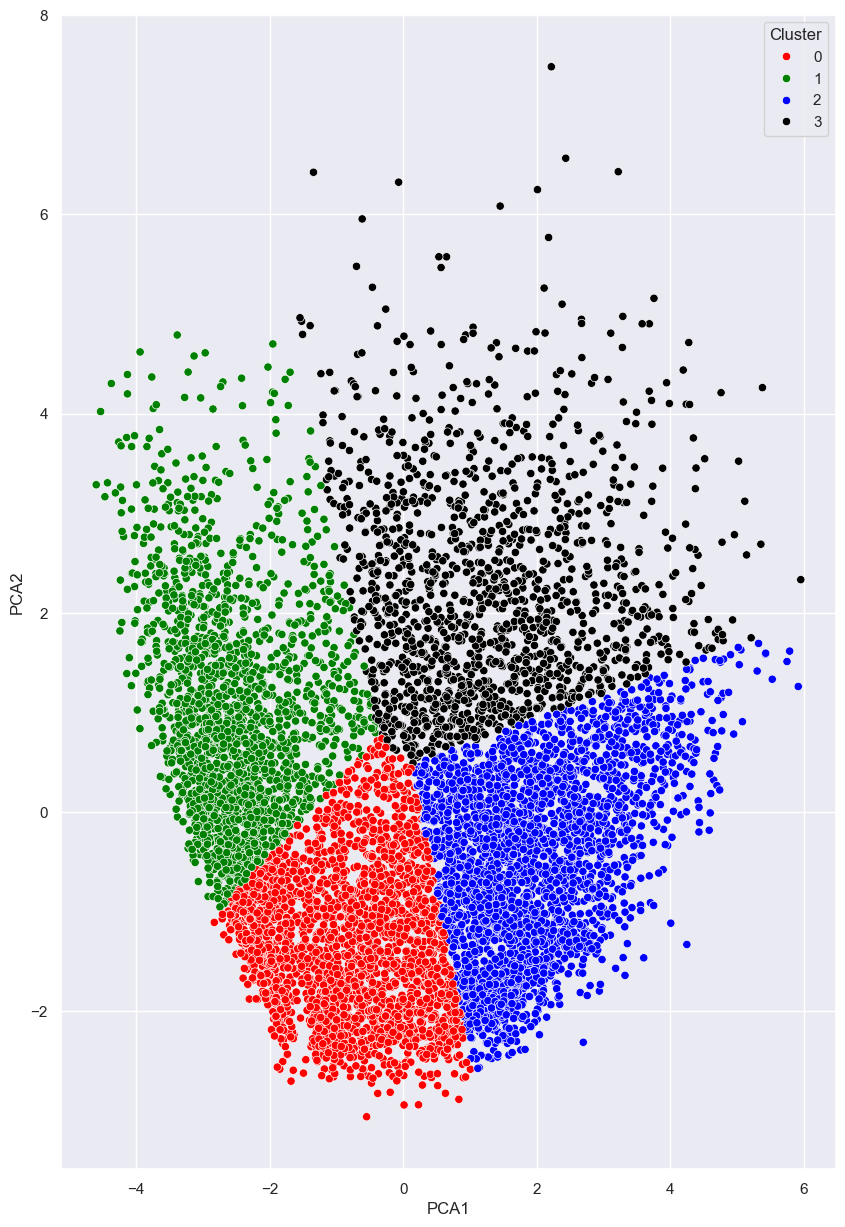

In [52]:
plt.figure(figsize = (10,15), facecolor = 'white')
sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'Cluster', data = df2, palette=['red','green','blue','black'])
# plt.grid()
plt.show()

Text(41.94891666666666, 0.5, 'PCA1')

<Figure size 3000x3000 with 0 Axes>

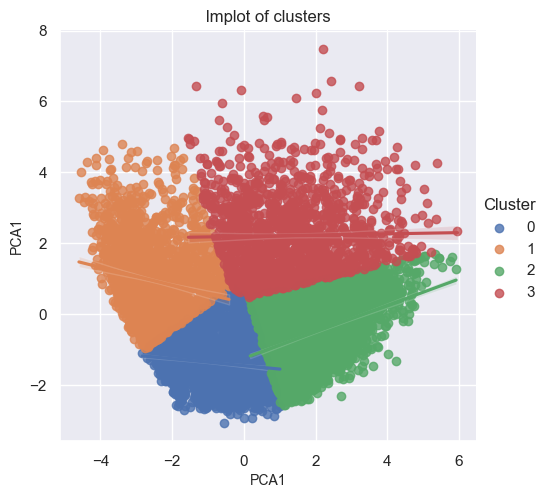

In [53]:
plt.figure(figsize = (30,30))
sns.lmplot(x = 'PCA1',y = 'PCA2', hue = 'Cluster', data = df2)
plt.title("lmplot of clusters")
plt.xlabel('PCA1', fontsize =10)
plt.ylabel('PCA1', fontsize =10)

Text(0.5, 1.0, 'Pie chart of Cluster')

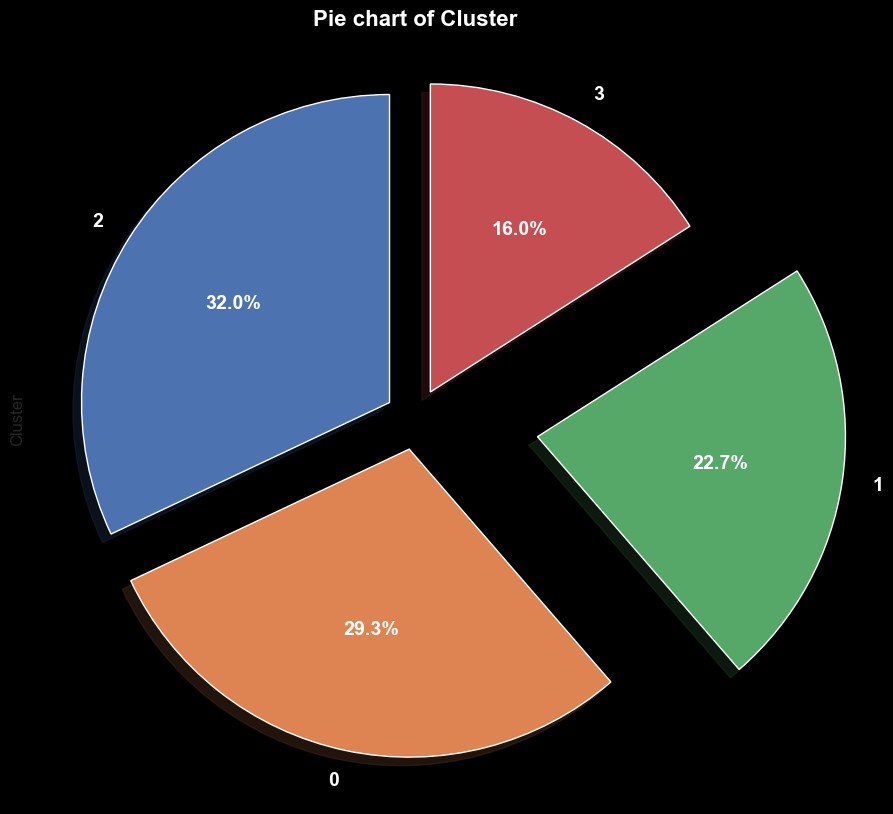

In [54]:
plt.figure(figsize= (10,10), facecolor='black')
vc = df2['Cluster'].value_counts()
vc.plot(kind = 'pie', labels = vc.index, explode= (0.1,0.1,0.4, 0.1), autopct = '%1.1f%%', startangle = 90,shadow = True,textprops={'fontsize': 14, 
                                                                                                                                   'fontweight': 'bold',
                                                                                                                                  'color':'white'})
plt.title("Pie chart of Cluster",  fontsize=16, fontweight='bold', color = 'white')

In [55]:
df2.head()

,PCA1,PCA2,Cluster
0,-1.042793,-2.659800,0
1,-2.312059,2.316876,1
2,0.749056,0.966009,3
3,-0.912578,-0.059726,0
4,-1.373956,-1.738436,0


In [56]:
# df_1_scale.head()

In [57]:
df['Cluster'] = model.labels_

In [58]:
df_clusters= df.copy()

In [59]:
df_clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,0.083333,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,1.000000,1499.00,38.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.343947,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12,0


In [60]:
clustered_cluster = model.cluster_centers_
clustered_cluster 

array([[-0.86622256, -1.3715001 ],
       [-2.52634389,  0.9429659 ],
       [ 1.9502522 , -0.5162297 ],
       [ 1.27790829,  2.21815411]])

In [61]:
df_clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,0.083333,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,1.000000,1499.00,38.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.343947,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12,0


In [62]:
cluster_1 = df_clusters[df_clusters['Cluster']== 0]
cluster_1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.0,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.00,12,0
3,1666.670542,1.000000,1499.00,38.0,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.343947,0.00,12,0
4,817.714335,1.000000,16.00,16.0,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.00,12,0
11,630.794744,0.818182,1492.18,38.0,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0.0,6.0,2000.0,705.618627,155.549069,0.00,12,0
17,41.089489,1.000000,519.00,0.0,519.0,0.000000,0.416667,0.000000,0.333333,0.000000,0.0,8.0,2500.0,254.590662,73.203221,0.25,12,0


In [63]:
cluster_2 = df_clusters[df_clusters['Cluster']== 1]
cluster_2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
1,3202.467416,0.909091,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12,1
14,2772.772734,1.000000,0.0,0.0,0.0,346.811390,0.000000,0.000000,0.0,0.083333,1.0,0.0,3000.0,805.647974,989.962866,0.000000,12,1
16,2072.074354,0.875000,0.0,0.0,0.0,2784.274703,0.000000,0.000000,0.0,0.250000,3.0,0.0,3000.0,391.974562,376.579631,0.000000,12,1
24,873.385231,1.000000,0.0,0.0,0.0,798.949863,0.000000,0.000000,0.0,0.363636,4.0,0.0,6000.0,1422.726707,1657.002877,0.000000,12,1
26,1615.967240,1.000000,102.0,102.0,0.0,244.840485,0.166667,0.166667,0.0,0.250000,5.0,2.0,1700.0,890.178845,971.183209,0.000000,12,1


In [64]:
cluster_3 = df_clusters[df_clusters['Cluster']== 2]
cluster_3.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
5,1809.828751,1.0,1333.28,0.00,89.00,0.0,0.666667,0.000000,0.583333,0.0,0.0,8.0,1800.0,1400.057770,312.343947,0.0,12,2
6,627.260806,1.0,361.28,38.00,688.38,0.0,1.000000,0.083333,1.000000,0.0,0.0,7.0,13500.0,856.901546,198.065894,0.0,12,2
7,1823.652743,1.0,436.20,0.00,436.20,0.0,1.000000,0.000000,1.000000,0.0,0.0,12.0,2300.0,679.065082,532.033990,0.0,12,2
8,1014.926473,1.0,861.49,661.49,200.00,0.0,0.333333,0.083333,0.250000,0.0,0.0,5.0,7000.0,688.278568,311.963409,0.0,12,2
9,152.225975,1.0,1281.60,1281.60,0.00,0.0,0.166667,0.166667,0.000000,0.0,0.0,3.0,11000.0,1164.770591,100.302262,0.0,12,2


In [65]:
cluster_4 = df_clusters[df_clusters['Cluster']== 3]
cluster_4.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,0.083333,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.0,12,3
15,873.385231,1.000000,1611.70,0.00,89.00,2301.491267,0.500000,0.000000,0.500000,0.166667,4.0,11.0,8000.0,1993.439277,312.343947,0.0,12,3
18,1989.072228,1.000000,504.35,166.00,338.35,0.000000,0.666667,0.083333,0.583333,0.000000,0.0,9.0,13000.0,1720.837373,744.613395,0.0,12,3
21,873.385231,1.000000,361.28,38.00,449.91,229.028245,1.000000,0.083333,1.000000,0.333333,6.0,7.0,11250.0,2077.959051,1659.775075,0.0,12,3
23,3800.151377,0.818182,361.28,38.00,793.79,0.000000,1.000000,0.083333,0.916667,0.333333,0.0,13.0,9000.0,856.901546,1425.426525,0.0,12,3


# visualization of clusters:

Text(0, 0.5, 'Accurance')

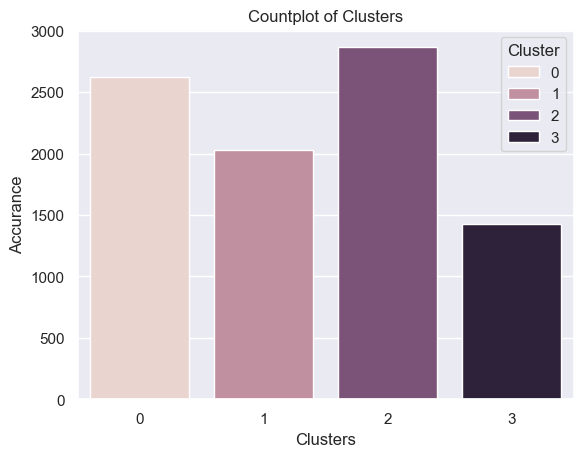

In [66]:
sns.countplot(x = 'Cluster', data = df_clusters, hue = 'Cluster')
plt.title("Countplot of Clusters")
plt.xlabel("Clusters")
plt.ylabel('Accurance')

In [67]:
df_clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,0.083333,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,1.000000,1499.00,38.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.343947,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12,0


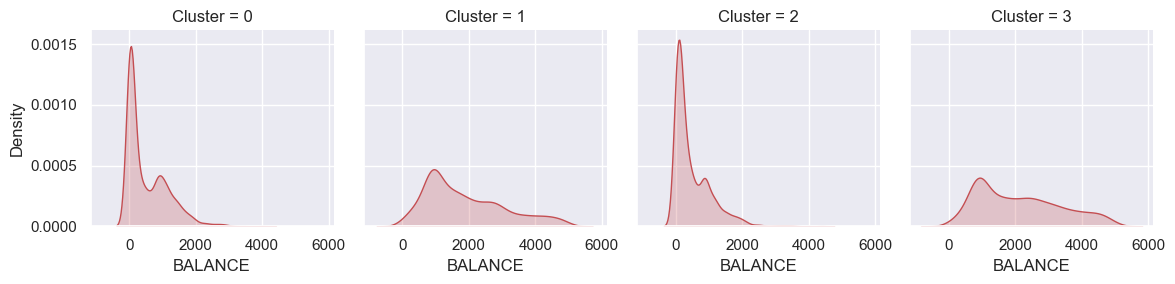

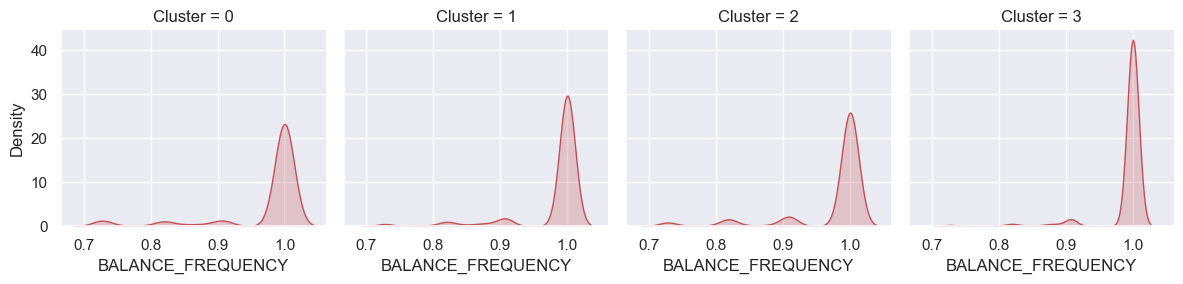

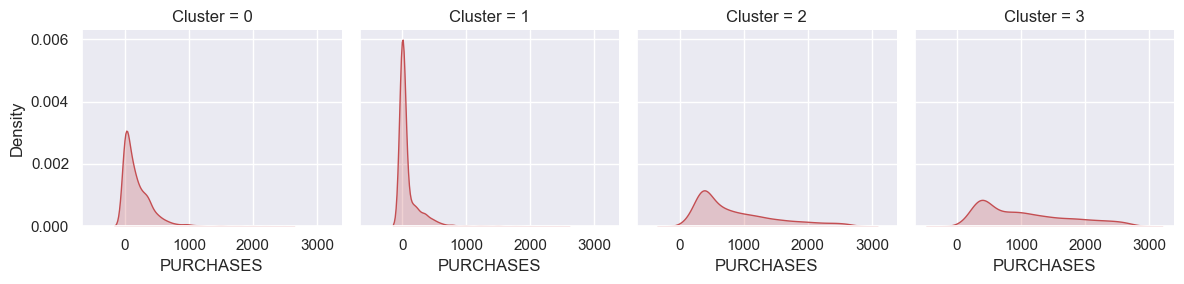

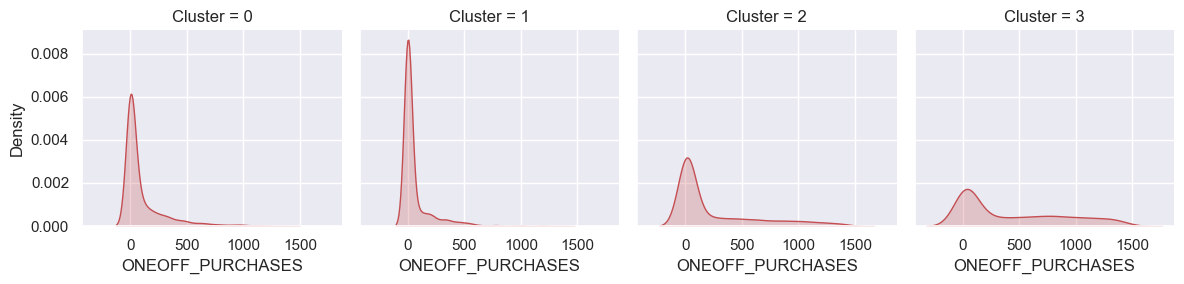

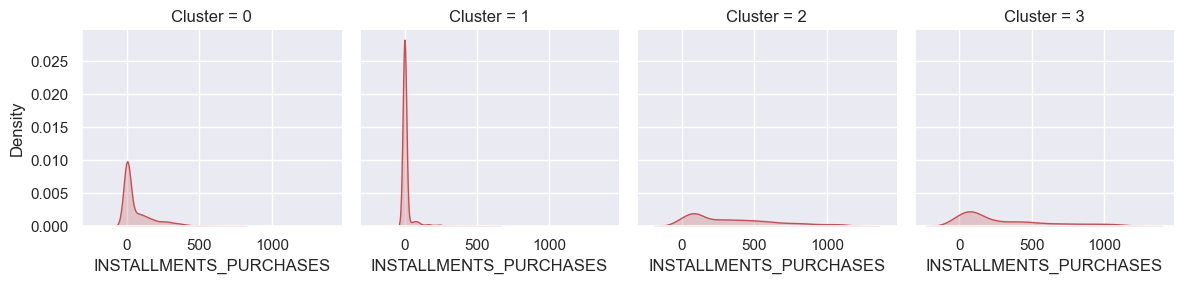

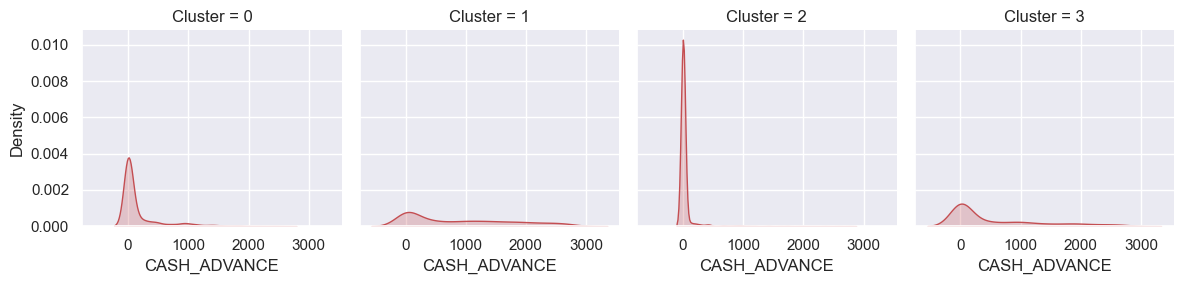

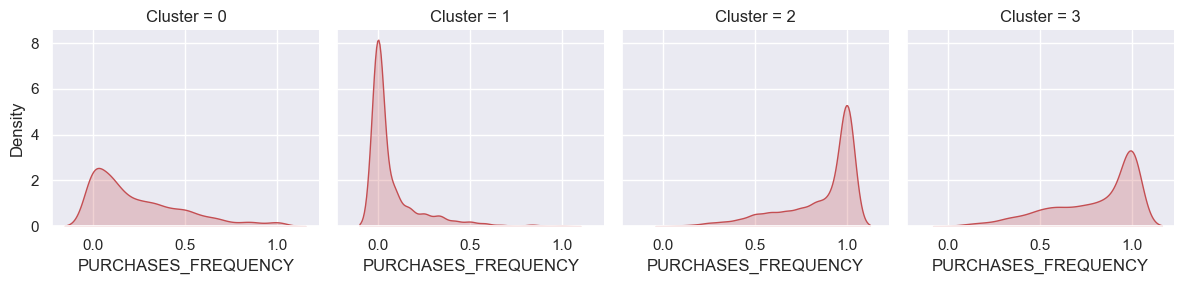

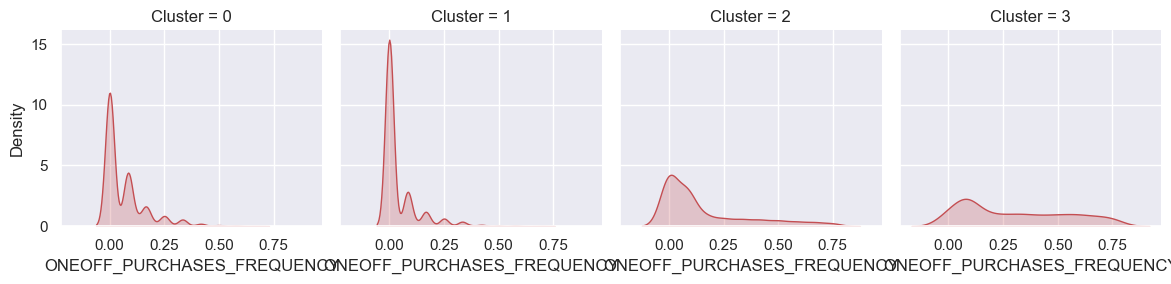

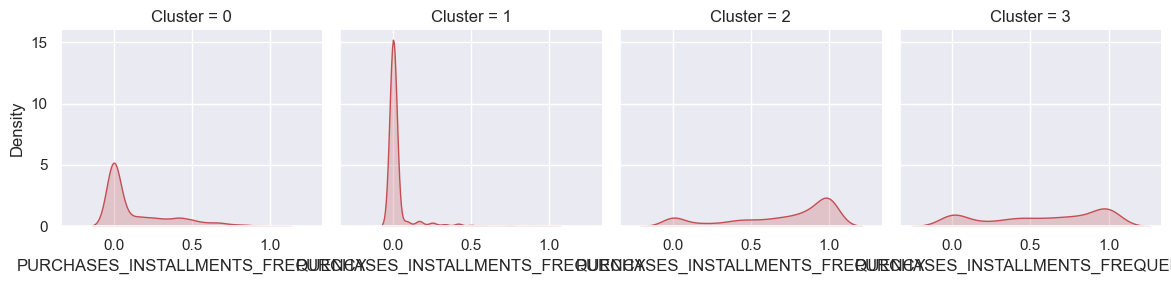

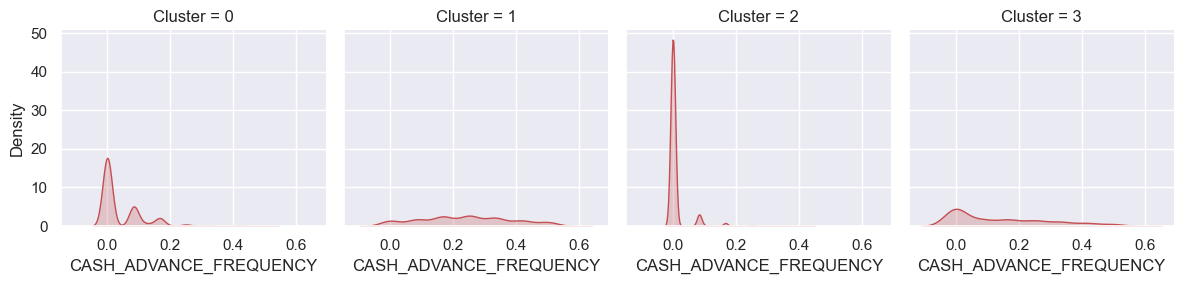

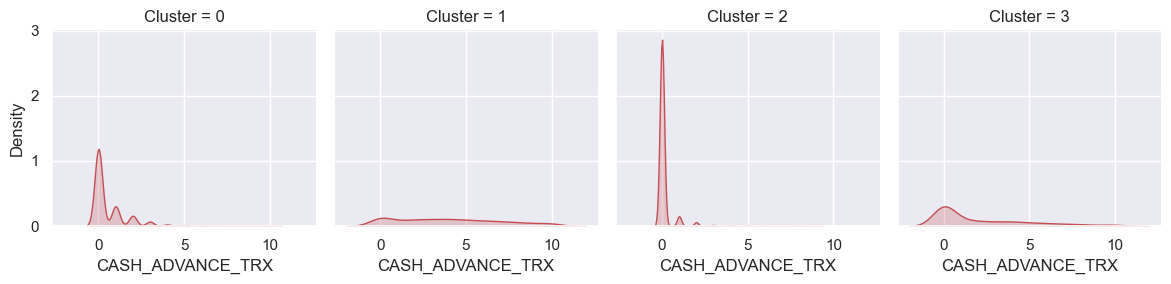

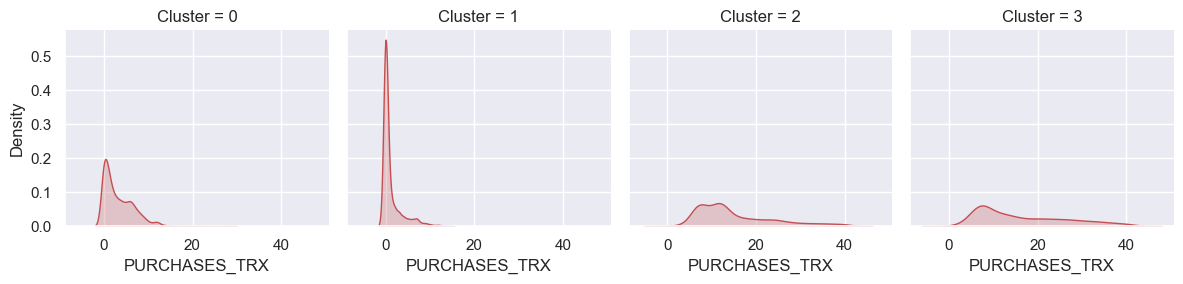

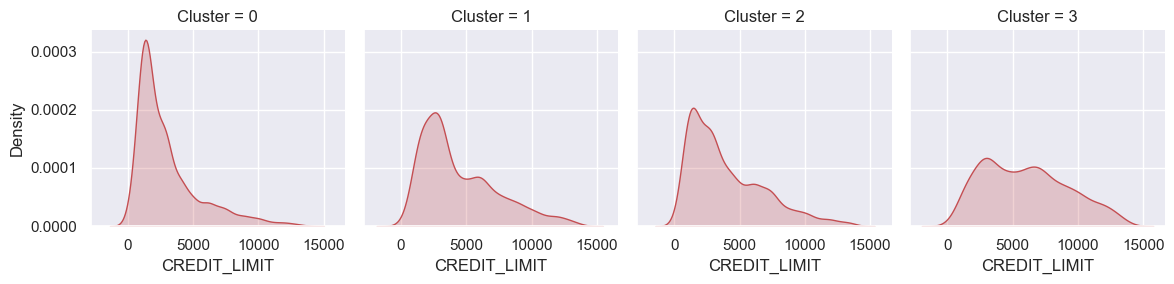

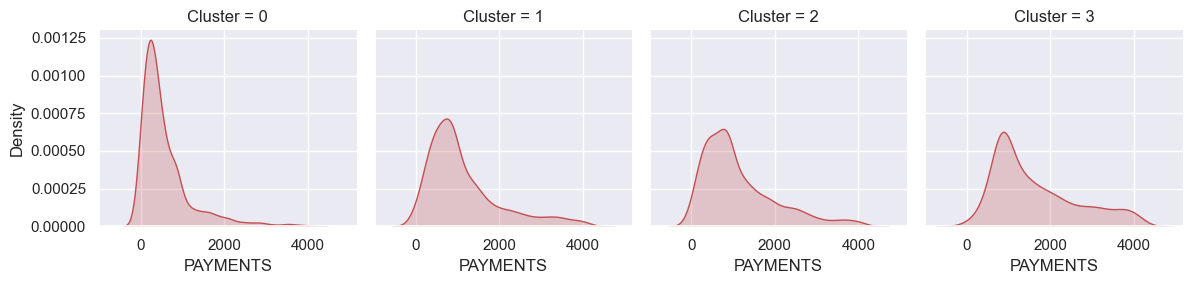

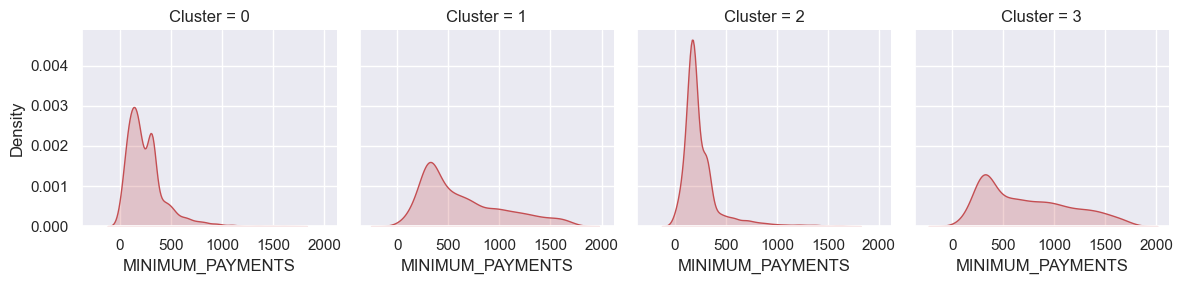

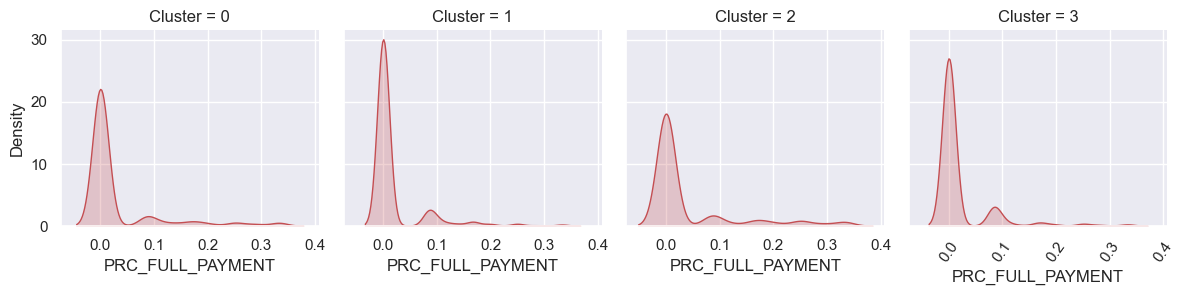

In [82]:
for col in df_clusters.drop(['Cluster','TENURE'], axis = 1):
    grid = sns.FacetGrid(df_clusters, col = 'Cluster')
    grid = grid.map(sns.kdeplot, col, color = 'r', fill = True)

plt.tight_layout()
plt.xticks(rotation = 55)
plt.show()

# AgglomerativeClustering:

In [71]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sc

In [73]:
df_1_scale.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.904888,-2.648641,-0.689370,-0.579149,-0.346206,-0.535016,-0.806490,-0.676778,-0.707313,-0.680573,-0.597663,-0.709401,-1.042417,-0.929030,-0.754559,-0.401432,0.0
1,1.862993,-1.141308,-0.842607,-0.579149,-0.692870,-0.535016,-1.221758,-0.676778,-0.916995,1.139671,1.012415,-0.920725,0.963202,3.357806,1.807482,2.739192,0.0
2,1.243751,0.366025,0.399302,1.713915,-0.692870,-0.535016,1.269843,-0.231028,-0.916995,-0.680573,-0.597663,0.347221,1.130337,-0.467225,0.585127,-0.401432,0.0
3,0.518437,0.366025,1.565170,-0.466449,-0.692870,-0.222243,-1.014125,-0.231028,-0.916995,-0.073827,-0.195143,-0.815063,1.130337,-1.150778,-0.279866,-0.401432,0.0
4,-0.224805,0.366025,-0.816907,-0.531696,-0.692870,-0.535016,-1.014125,-0.231028,-0.916995,-0.680573,-0.597663,-0.815063,-0.975563,-0.405396,-0.465401,-0.401432,0.0


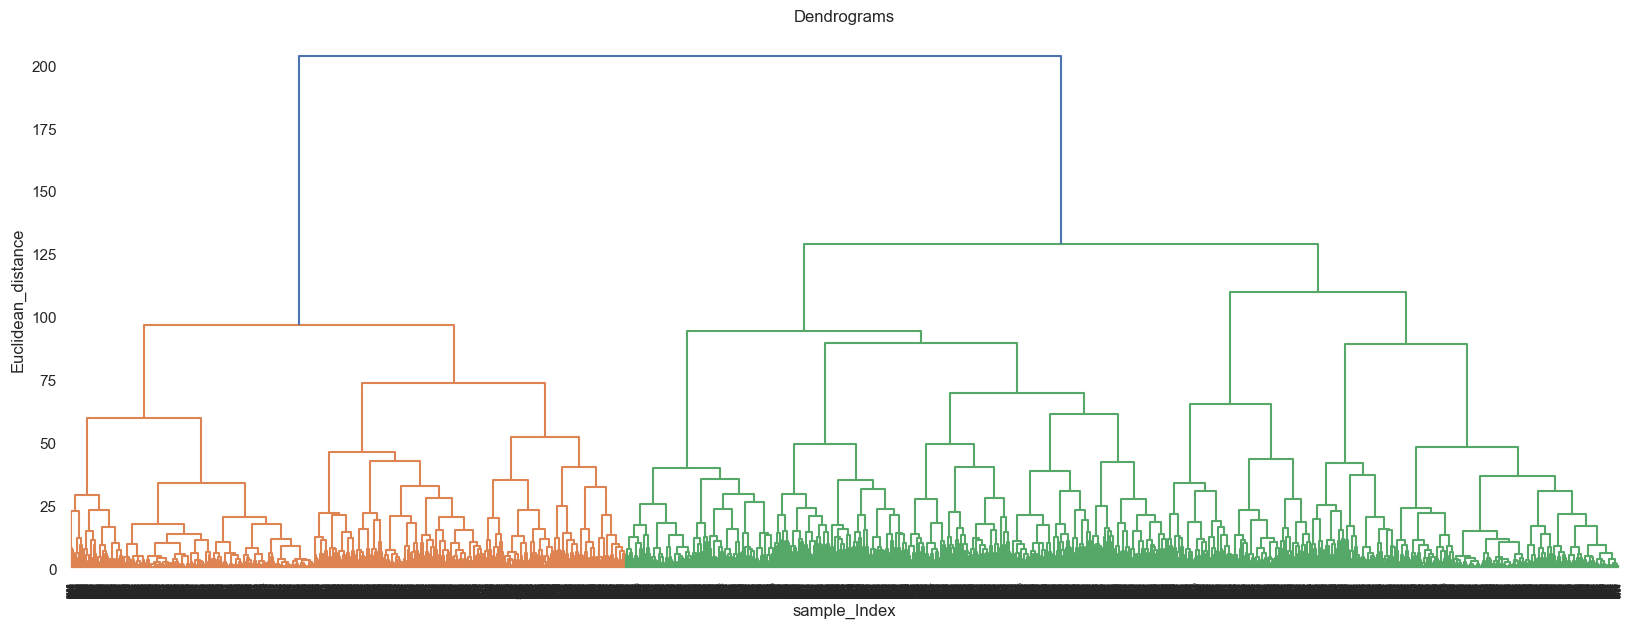

In [80]:
sns.set(style = 'darkgrid')
plt.figure(figsize = (20, 7))
plt.title("Dendrograms")

sc.dendrogram(sc.linkage(df_1_scale, method = 'ward'))
plt.title("Dendrograms")
plt.xlabel("sample_Index")
plt.ylabel("Euclidean_distance")
plt.show()

In [75]:
agglo = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
agglo.fit(df_1_scale)

AgglomerativeClustering(n_clusters=4)

In [76]:
labels_ = agglo.labels_

In [78]:
df2['Agglo_cluster'] = labels_

<Axes: xlabel='PCA1', ylabel='PCA2'>

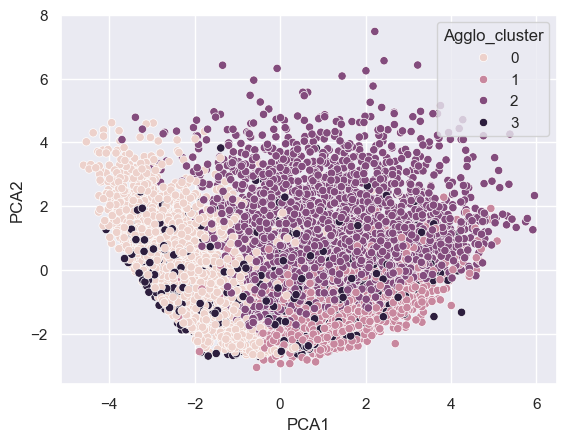

In [79]:
sns.set(style = 'darkgrid')
sns.scatterplot(x = 'PCA1',y = 'PCA2', hue = 'Agglo_cluster', data = df2)

# Saving KMeans model:

In [134]:
import joblib

In [135]:
joblib.dump(model, 'model.pkl.123')

['model.pkl.123']

# Training and Tesiting of model using RandomForest and SVM:

# Here we will use scaled version of our data set:

In [136]:
df_1_scale['Clusters'] = model.labels_

In [137]:
df_1_scale.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Clusters
0,-0.904888,-2.648641,-0.689370,-0.579149,-0.346206,-0.535016,-0.806490,-0.676778,-0.707313,-0.680573,-0.597663,-0.709401,-1.042417,-0.929030,-0.754559,-0.401432,0.0,2
1,1.862993,-1.141308,-0.842607,-0.579149,-0.692870,-0.535016,-1.221758,-0.676778,-0.916995,1.139671,1.012415,-0.920725,0.963202,3.357806,1.807482,2.739192,0.0,1
2,1.243751,0.366025,0.399302,1.713915,-0.692870,-0.535016,1.269843,-0.231028,-0.916995,-0.680573,-0.597663,0.347221,1.130337,-0.467225,0.585127,-0.401432,0.0,0
3,0.518437,0.366025,1.565170,-0.466449,-0.692870,-0.222243,-1.014125,-0.231028,-0.916995,-0.073827,-0.195143,-0.815063,1.130337,-1.150778,-0.279866,-0.401432,0.0,2
4,-0.224805,0.366025,-0.816907,-0.531696,-0.692870,-0.535016,-1.014125,-0.231028,-0.916995,-0.680573,-0.597663,-0.815063,-0.975563,-0.405396,-0.465401,-0.401432,0.0,2


In [138]:
x = df_1_scale.iloc[:,:-1]
y = df_1_scale.iloc[:,-1]

In [139]:
x.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.904888,-2.648641,-0.689370,-0.579149,-0.346206,-0.535016,-0.806490,-0.676778,-0.707313,-0.680573,-0.597663,-0.709401,-1.042417,-0.929030,-0.754559,-0.401432,0.0
1,1.862993,-1.141308,-0.842607,-0.579149,-0.692870,-0.535016,-1.221758,-0.676778,-0.916995,1.139671,1.012415,-0.920725,0.963202,3.357806,1.807482,2.739192,0.0
2,1.243751,0.366025,0.399302,1.713915,-0.692870,-0.535016,1.269843,-0.231028,-0.916995,-0.680573,-0.597663,0.347221,1.130337,-0.467225,0.585127,-0.401432,0.0
3,0.518437,0.366025,1.565170,-0.466449,-0.692870,-0.222243,-1.014125,-0.231028,-0.916995,-0.073827,-0.195143,-0.815063,1.130337,-1.150778,-0.279866,-0.401432,0.0
4,-0.224805,0.366025,-0.816907,-0.531696,-0.692870,-0.535016,-1.014125,-0.231028,-0.916995,-0.680573,-0.597663,-0.815063,-0.975563,-0.405396,-0.465401,-0.401432,0.0


In [140]:
y.head()

0    2
1    1
2    0
3    2
4    2
Name: Clusters, dtype: int32

In [141]:
y.value_counts()

3    2557
2    2249
0    2112
1    2032
Name: Clusters, dtype: int64

In [142]:
Counter(x)

Counter({'BALANCE': 1,
         'BALANCE_FREQUENCY': 1,
         'PURCHASES': 1,
         'ONEOFF_PURCHASES': 1,
         'INSTALLMENTS_PURCHASES': 1,
         'CASH_ADVANCE': 1,
         'PURCHASES_FREQUENCY': 1,
         'ONEOFF_PURCHASES_FREQUENCY': 1,
         'PURCHASES_INSTALLMENTS_FREQUENCY': 1,
         'CASH_ADVANCE_FREQUENCY': 1,
         'CASH_ADVANCE_TRX': 1,
         'PURCHASES_TRX': 1,
         'CREDIT_LIMIT': 1,
         'PAYMENTS': 1,
         'MINIMUM_PAYMENTS': 1,
         'PRC_FULL_PAYMENT': 1,
         'TENURE': 1})

In [143]:
Counter(y)

Counter({3: 2557, 2: 2249, 0: 2112, 1: 2032})

In [144]:
x_sm, y_sm = sm.fit_resample(x,y)

In [145]:
Counter(x_sm)

Counter({'BALANCE': 1,
         'BALANCE_FREQUENCY': 1,
         'PURCHASES': 1,
         'ONEOFF_PURCHASES': 1,
         'INSTALLMENTS_PURCHASES': 1,
         'CASH_ADVANCE': 1,
         'PURCHASES_FREQUENCY': 1,
         'ONEOFF_PURCHASES_FREQUENCY': 1,
         'PURCHASES_INSTALLMENTS_FREQUENCY': 1,
         'CASH_ADVANCE_FREQUENCY': 1,
         'CASH_ADVANCE_TRX': 1,
         'PURCHASES_TRX': 1,
         'CREDIT_LIMIT': 1,
         'PAYMENTS': 1,
         'MINIMUM_PAYMENTS': 1,
         'PRC_FULL_PAYMENT': 1,
         'TENURE': 1})

In [146]:
x_train, x_test, y_train, y_test =train_test_split(x_sm, y_sm, stratify=y_sm, test_size = 0.20, random_state = 54)

In [147]:
x_train.shape,x_test.shape

((8182, 17), (2046, 17))

In [148]:
y_train.shape, y_test.shape

((8182,), (2046,))

In [149]:
rf = RandomForestClassifier()

In [150]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [151]:
y_rf = rf.predict(x_test)

In [152]:
y_rf_f1= f1_score(y_test, y_rf, average='macro')


print(f"Classification_report :\n {classification_report(y_test, y_rf)}")

Classification_report :
               precision    recall  f1-score   support

           0       0.90      0.95      0.92       511
           1       0.94      0.95      0.94       512
           2       0.96      0.93      0.94       511
           3       0.92      0.90      0.91       512

    accuracy                           0.93      2046
   macro avg       0.93      0.93      0.93      2046
weighted avg       0.93      0.93      0.93      2046



# L2 Regularization (lasso Regularization for feature selection Method):

In [153]:
sel_ = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))

In [154]:
sel_.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(random_state=42))

In [155]:
sel_.get_support()

array([ True, False,  True, False, False, False,  True, False, False,
        True,  True,  True, False,  True,  True, False, False])

In [156]:
selected_feat = x_train.columns[(sel_.get_support())]

In [157]:
selected_feat

Index(['BALANCE', 'PURCHASES', 'PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PAYMENTS', 'MINIMUM_PAYMENTS'],
      dtype='object')

In [158]:
x1 = x_sm[['BALANCE', 'PURCHASES', 'PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PAYMENTS', 'MINIMUM_PAYMENTS']]

In [159]:
x_train, x_test, y_train, y_test =train_test_split(x1, y_sm, stratify=y_sm, test_size = 0.20, random_state = 54)

In [160]:
rf= RandomForestClassifier()

In [161]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [162]:
y_rf = rf.predict(x_test)

In [163]:
f1_score(y_test, y_rf, average='macro')

0.8852250763115777

In [164]:
print(classification_report(y_test,y_rf))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       511
           1       0.91      0.89      0.90       512
           2       0.91      0.90      0.90       511
           3       0.88      0.85      0.87       512

    accuracy                           0.89      2046
   macro avg       0.89      0.89      0.89      2046
weighted avg       0.89      0.89      0.89      2046



# XGBClassifier:

In [165]:
from xgboost import XGBClassifier

In [166]:
xg = XGBClassifier()

In [167]:
xg.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [168]:
y_xg = xg.predict(x_test)

In [169]:
print(classification_report(y_test, y_xg))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       511
           1       0.90      0.88      0.89       512
           2       0.90      0.90      0.90       511
           3       0.88      0.85      0.86       512

    accuracy                           0.88      2046
   macro avg       0.88      0.88      0.88      2046
weighted avg       0.88      0.88      0.88      2046



In [170]:
xg_f1 = f1_score(y_test, y_rf, average='macro')
print(f"XGBClassifer F1_score : \n\t{xg_f1}")

XGBClassifer F1_score : 
	0.8852250763115777


In [172]:
df_clusters.to_csv("new_Clustered_customer.csv")

# Saving the model for fututre prediction :

In [107]:
import pickle

In [108]:
filename= 'final_model.sv'
result = pickle.dump(xg, open(filename, 'wb'))

In [109]:
load_model = pickle.load(open(filename, 'rb'))
result =load_model.score(x_test, y_test)
print(f"Accuracy score : {result:.2f}")

Accuracy score : 0.92
